# Data Mining Analysis of the Global Mobile Game Market  
**Author**: Ji Weng  
**Last Updated**: 2025/04/12

---
## 📌 Project Overview
This study analyzes global mobile gaming trends from 2020 to 2024, with the following key objectives:

###  1. Regional Trend Analysis
- Identify major regions driving **downloads** and **revenue**.
- Analyze **user acquisition** and **monetization trends**.
- Forecast **2025 performance** based on historical data.

###  2. Country-Level Clustering
- Uncover **market archetypes** through clustering.
- Examine **platform shares** (Android vs. iOS).
- Evaluate **genre performance** and **growth patterns** by country.

###  3. Game-Level Clustering
- Explore relationships between **game metrics** (e.g., DAU, revenue) and **genres**.
- Identify **opportunities** for developers and publishers based on game-level insights.


## 🧪Methodology

This study employs a range of data mining techniques from the **IE7275 course**, including:

###  Data Cleaning and Preprocessing
- Handling **missing values**, standardizing formats, and ensuring **data integrity**.

###  Exploratory Data Analysis (EDA)
- Visualizing trends in **downloads**, **revenue**, and **platform performance** to uncover macro-level insights.

###  Clustering Analysis
- Applying **K-Means**, **Hierarchical Clustering**, and **DBSCAN** to group **countries** and **games** based on key metrics.
- Using the **elbow method** to determine the optimal number of clusters.
- Applying **Principal Component Analysis (PCA)** for dimensionality reduction and enhanced interpretability.

###  Predictive Modeling
- Utilizing **Linear Regression** to forecast **2025 downloads and revenue**.
- Chosen for its **simplicity** and suitability for modeling **sparse annual data**.

###  Visual Analytics
- Presenting findings through **line charts**, **pie charts**, and **heatmaps** for clear communication.

---

These methods enable a **comprehensive analysis** of market trends, regional dynamics, and game performance, offering **actionable insights** for developers, publishers, and analysts.


## 📂 Dataset Overview

### 📌 Data Sources

The dataset is sourced from **Sensor Tower**, the industry’s leading third-party analytics platform for mobile applications. It provides comprehensive statistics on:

- Global **mobile game downloads**
- **Revenue**
- **Genre-level performance**

Raw data was exported in **CSV format**, cleaned, and preprocessed for analysis.

> 📎 Public Repository:  
> 🔗 [GitHub - Mobile Game Market Analysis](https://github.com/ponyo2024/mobile_game_market_analysis/)

---

### 📦 Data Description

The dataset comprises **115 CSV files**, totaling **1.15 million rows**, including:

- **Global Top 10,000 Apps by Revenue** (2020–2024):  
  *5 files* (1 per year), **50,000 rows** total  
- **Global Top 10,000 Apps by Downloads** (2020–2024):  
  *5 files* (1 per year), **50,000 rows** total  
- **Top 10,000 Apps by Revenue in 21 High-GDP Countries** (2020–2024):  
  *105 files* (21 countries × 5 years), **1,050,000 rows** total  

---

### 📑 Column Descriptions

| **Column**                  | **Description**                                             |
|----------------------------|-------------------------------------------------------------|
| `App Name`                 | Name of the mobile game                                     |
| `App ID`                   | Unique identifier for the app                               |
| `Publisher Name`           | Name of the app’s publisher                                 |
| `Publisher ID`             | Unique identifier for the publisher                         |
| `Platform`                 | Android (Google Play) or iOS (App Store)                    |
| `Downloads (Absolute)`     | Total number of downloads                                   |
| `Revenue (Absolute, $)`    | Total revenue in US dollars                                 |
| `Average DAU (Absolute)`   | Average daily active users                                  |
| `RPD (All Time, WW)`       | Revenue per download, all-time, worldwide                   |
| `Game Genre`               | Genre (e.g., puzzle, strategy, shooter, simulation, casino) |

---

This extensive dataset forms the foundation for the project’s exploratory, clustering, and predictive analyses.


# 📌 PART 1： Global Macro Data

---

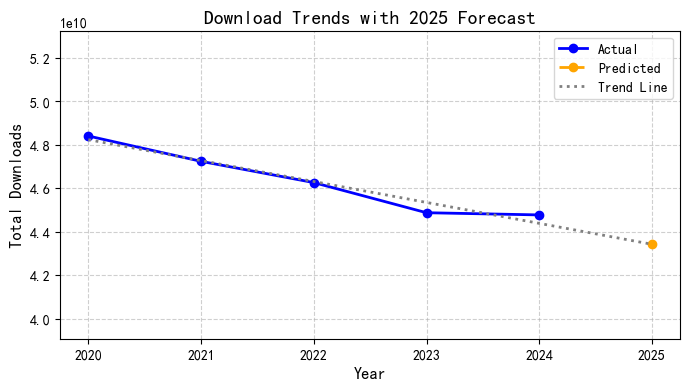

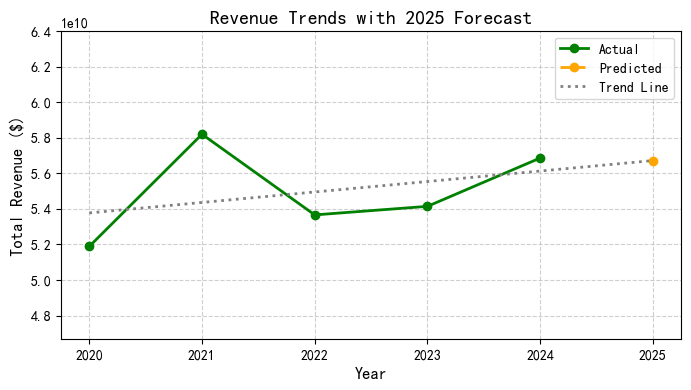

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from sklearn.linear_model import LinearRegression

# Set Chinese font and allow minus sign display
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# File path and year range
base_path = r'C:\Users\selma\Desktop\game_trend'
years = ['2020', '2021', '2022', '2023', '2024']

# Function to read csv files
def read_data(prefix, year):
    return pd.read_csv(os.path.join(base_path, f'{prefix}_{year}.csv'), encoding='utf-16', sep='\t')

# Read downloads and revenue data
downloads = {year: read_data('downloads', year) for year in years}
revenue = {year: read_data('revenue', year) for year in years}

# Summarize total downloads and revenue
downloads_summary = pd.DataFrame({
    'Year': years,
    'Total_Downloads': [downloads[year]['Downloads (Absolute)'].sum() for year in years]
})

revenue_summary = pd.DataFrame({
    'Year': years,
    'Total_Revenue': [revenue[year]['Revenue (Absolute, $)'].sum() for year in years]
})

# Function to predict and append 2025
def predict_next_year(df, value_col, target_year='2025'):
    X = df['Year'].astype(int).values.reshape(-1, 1)
    y = df[value_col].values
    model = LinearRegression().fit(X, y)
    pred_value = model.predict(np.array([[int(target_year)]]))[0]
    new_row = pd.DataFrame({'Year': [target_year], value_col: [pred_value]})
    return pd.concat([df, new_row], ignore_index=True)

# Add prediction for 2025
downloads_with_prediction = predict_next_year(downloads_summary, 'Total_Downloads')
revenue_with_prediction = predict_next_year(revenue_summary, 'Total_Revenue')

# Plot with trend line and predicted value
def plot_trend_with_prediction(df, value_col, title, ylabel, color='blue', pred_year='2025'):
    plt.figure(figsize=(8, 4))
    
    # Split actual and predicted data
    actual_df = df[df['Year'] != pred_year]
    pred_df = df[df['Year'] == pred_year]

    # Plot actual data
    plt.plot(actual_df['Year'], actual_df[value_col], marker='o', linestyle='-', linewidth=2, color=color, label='Actual')

    # Plot predicted data
    plt.plot(pred_df['Year'], pred_df[value_col], marker='o', linestyle='--', linewidth=2, color='orange', label='Predicted')

    # Plot trend line
    X = df['Year'].astype(int).values.reshape(-1, 1)
    y = df[value_col].values
    model = LinearRegression().fit(X, y)
    trend_y = model.predict(X)
    plt.plot(df['Year'], trend_y, linestyle=':', linewidth=2, color='gray', label='Trend Line')

    # Plot formatting
    plt.title(title, fontsize=14)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.ylim(y.min() * 0.9, y.max() * 1.1)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend()
    plt.show()

# Plot overall trends
plot_trend_with_prediction(downloads_with_prediction, 'Total_Downloads', 'Download Trends with 2025 Forecast', 'Total Downloads')
plot_trend_with_prediction(revenue_with_prediction, 'Total_Revenue', 'Revenue Trends with 2025 Forecast', 'Total Revenue ($)', color='green')

## breakdown by OS (google play/ios)

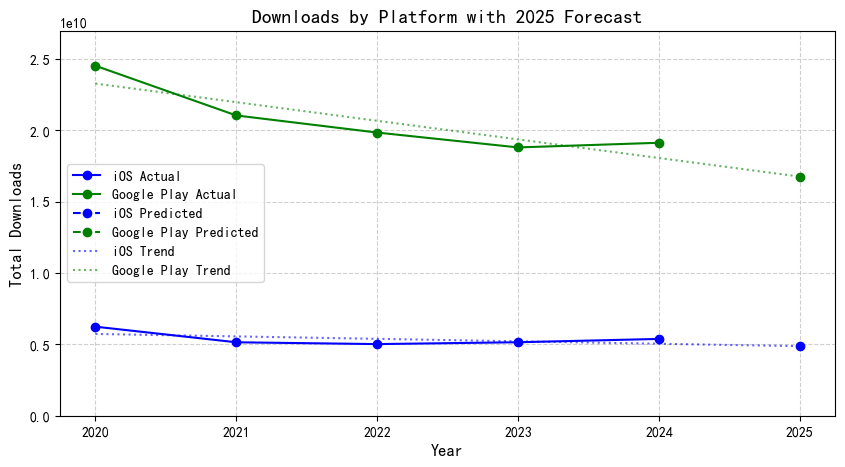

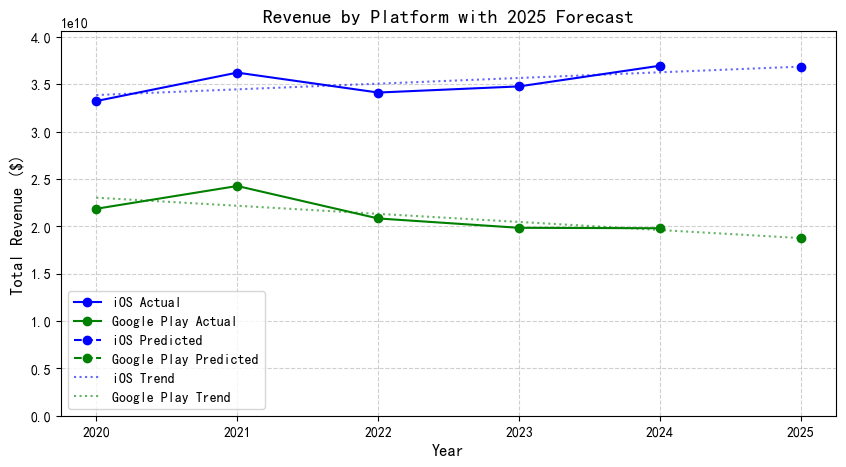

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from sklearn.linear_model import LinearRegression

# Set Chinese font and allow minus sign display
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# File path and year range
platform_path = r'C:\Users\selma\Desktop\game_trend\platform'
years = ['2020', '2021', '2022', '2023', '2024']

# Function to read platform-specific csv files
def read_platform_data(platform, year):
    return pd.read_csv(os.path.join(platform_path, f'{platform}_{year}.csv'), encoding='utf-16', sep='\t')

# Read iOS and Google Play data
ios_downloads = {year: read_platform_data('ios', year) for year in years}
gp_downloads = {year: read_platform_data('gp', year) for year in years}
ios_revenue = {year: read_platform_data('ios', year) for year in years}
gp_revenue = {year: read_platform_data('gp', year) for year in years}

# Summarize downloads and revenue by platform
ios_summary = pd.DataFrame({
    'Year': years,
    'Total_Downloads': [ios_downloads[year]['Downloads (Absolute)'].sum() for year in years],
    'Total_Revenue': [ios_revenue[year]['Revenue (Absolute, $)'].sum() for year in years]
})

gp_summary = pd.DataFrame({
    'Year': years,
    'Total_Downloads': [gp_downloads[year]['Downloads (Absolute)'].sum() for year in years],
    'Total_Revenue': [gp_revenue[year]['Revenue (Absolute, $)'].sum() for year in years]
})

# Function to predict and append 2025
def predict_next_year(df, value_col, target_year='2025'):
    X = df['Year'].astype(int).values.reshape(-1, 1)
    y = df[value_col].values
    model = LinearRegression().fit(X, y)
    pred_value = model.predict(np.array([[int(target_year)]]))[0]
    new_row = pd.DataFrame({'Year': [target_year], value_col: [pred_value]})
    return pd.concat([df, new_row], ignore_index=True)

# Predict 2025 for iOS and Google Play
ios_summary_with_pred_dl = predict_next_year(ios_summary[['Year', 'Total_Downloads']], 'Total_Downloads')
gp_summary_with_pred_dl = predict_next_year(gp_summary[['Year', 'Total_Downloads']], 'Total_Downloads')

ios_summary_with_pred_rev = predict_next_year(ios_summary[['Year', 'Total_Revenue']], 'Total_Revenue')
gp_summary_with_pred_rev = predict_next_year(gp_summary[['Year', 'Total_Revenue']], 'Total_Revenue')

# Plot combined trend for platforms
def plot_combined_trend(df1, df2, value_col, title, ylabel, label1='Platform 1', label2='Platform 2', color1='blue', color2='green', pred_year='2025'):
    plt.figure(figsize=(10, 5))

    # Actual & predicted
    actual1 = df1[df1['Year'] != pred_year]
    pred1 = df1[df1['Year'] == pred_year]
    actual2 = df2[df2['Year'] != pred_year]
    pred2 = df2[df2['Year'] == pred_year]

    # Plot actual values
    plt.plot(actual1['Year'], actual1[value_col], marker='o', linestyle='-', color=color1, label=f'{label1} Actual')
    plt.plot(actual2['Year'], actual2[value_col], marker='o', linestyle='-', color=color2, label=f'{label2} Actual')

    # Plot predicted points
    plt.plot(pred1['Year'], pred1[value_col], marker='o', linestyle='--', color=color1, label=f'{label1} Predicted')
    plt.plot(pred2['Year'], pred2[value_col], marker='o', linestyle='--', color=color2, label=f'{label2} Predicted')

    # Trend lines
    X1 = df1['Year'].astype(int).values.reshape(-1, 1)
    y1 = df1[value_col].values
    model1 = LinearRegression().fit(X1, y1)
    plt.plot(df1['Year'], model1.predict(X1), linestyle=':', color=color1, alpha=0.6, label=f'{label1} Trend')

    X2 = df2['Year'].astype(int).values.reshape(-1, 1)
    y2 = df2[value_col].values
    model2 = LinearRegression().fit(X2, y2)
    plt.plot(df2['Year'], model2.predict(X2), linestyle=':', color=color2, alpha=0.6, label=f'{label2} Trend')

    # Formatting
    plt.title(title, fontsize=14)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    y_min = min(y1.min(), y2.min())
    y_max = max(y1.max(), y2.max())
    plt.ylim(0, y_max * 1.1)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend()
    plt.show()

# Plot platform-specific trends
plot_combined_trend(
    ios_summary_with_pred_dl, gp_summary_with_pred_dl, 'Total_Downloads',
    'Downloads by Platform with 2025 Forecast', 'Total Downloads',
    label1='iOS', label2='Google Play', color1='blue', color2='green'
)
plot_combined_trend(
    ios_summary_with_pred_rev, gp_summary_with_pred_rev, 'Total_Revenue',
    'Revenue by Platform with 2025 Forecast', 'Total Revenue ($)',
    label1='iOS', label2='Google Play', color1='blue', color2='green'
)

### 🌍 Discussion -- Global Trends: Downloads vs. Revenue (2020–2024)

- From 2020 to 2024, both iOS and Google Play show a gradual decline in total downloads. The forecast for 2025 suggests this downward trend will continue, especially for Google Play, whose downloads have decreased more sharply than iOS.

- In terms of revenue, iOS consistently outperforms Google Play throughout the 5-year period. While iOS revenue remains relatively stable with slight growth, Google Play shows a mild decline. The 2025 projection indicates that the revenue gap between the two platforms may widen further.

- These trends highlight a shift in market dynamics where iOS maintains stronger monetization despite a relatively smaller user base, while Google Play experiences both user and revenue shrinkage.




## Download and revenue trends by country

  Country  Year  Downloads (Absolute)  Revenue (Absolute, $)
0      br  2020            3049581264           3.463250e+08
1      br  2021            2691608195           3.366365e+08
2      br  2022            2675738348           3.794712e+08
3      br  2023            2482231256           3.692128e+08
4      br  2024            2374956781           3.949682e+08
5      ca  2020             324968863           9.509761e+08
6      ca  2021             266508302           1.081947e+09
7      ca  2022             256061624           1.021888e+09
8      ca  2023             250078213           1.035326e+09
9      ca  2024             249729275           1.126704e+09


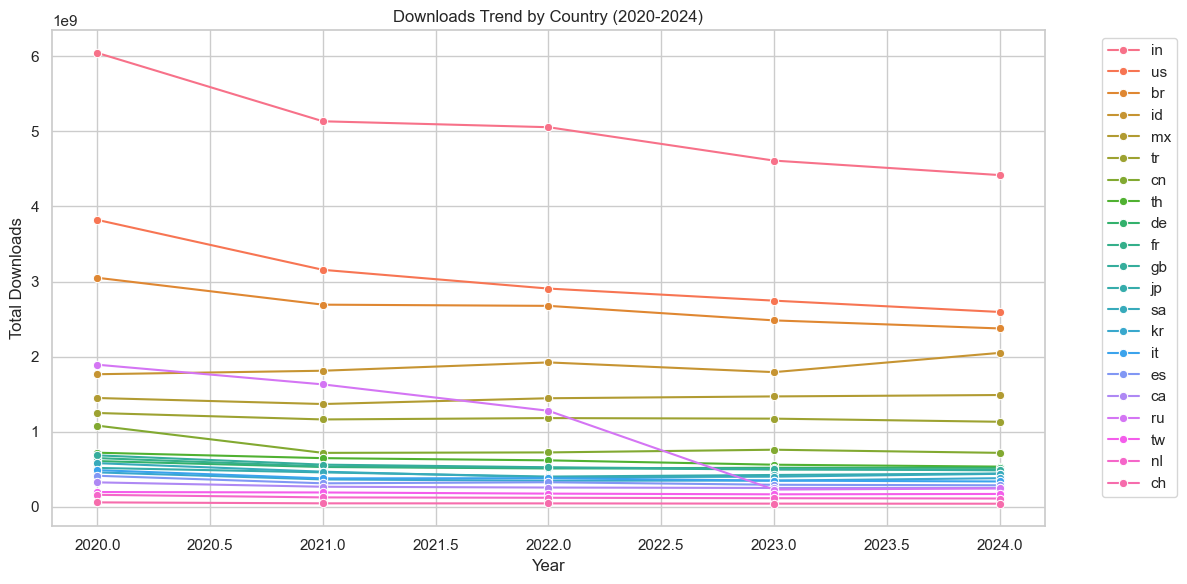

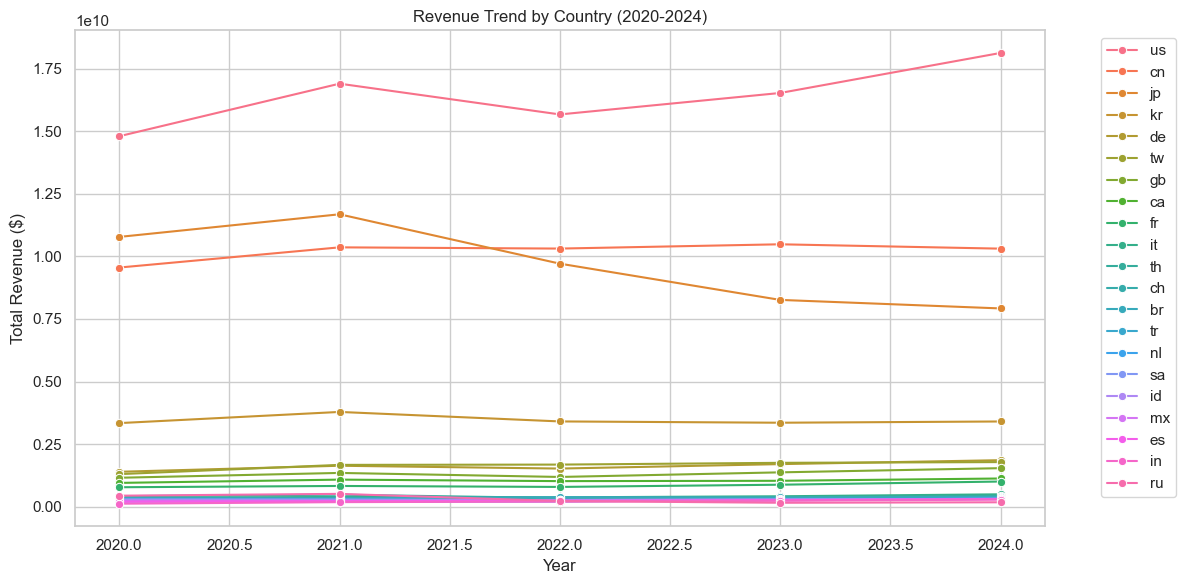

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import glob
import os

sns.set(style='whitegrid')

# data path
data_path = r"C:\Users\selma\Desktop\game_trend\country"
file_list = glob.glob(os.path.join(data_path, '*.csv'))

# combine data
all_country_data = pd.DataFrame()
for file in file_list:
    temp_df = pd.read_csv(file, encoding='utf-16', sep='\t')
    filename = os.path.basename(file)
    country, year = filename.replace('.csv', '').split('_')
    temp_df['Country'] = country
    temp_df['Year'] = int(year)
    all_country_data = pd.concat([all_country_data, temp_df], ignore_index=True)

# data aggregation
country_yearly = all_country_data.groupby(['Country', 'Year']).agg({
    'Downloads (Absolute)': 'sum',
    'Revenue (Absolute, $)': 'sum'
}).reset_index()

# save to file
country_yearly.to_csv('21_countries_5year_summary.csv', index=False)

# display 
print(country_yearly.head(10))

# Sort by the latest year (2024)
latest_year = country_yearly['Year'].max()
country_order_downloads = country_yearly[country_yearly['Year'] == latest_year] \
    .sort_values('Downloads (Absolute)', ascending=False)['Country'].tolist()

country_order_revenue = country_yearly[country_yearly['Year'] == latest_year] \
    .sort_values('Revenue (Absolute, $)', ascending=False)['Country'].tolist()

# Line chart - Downloads
plt.figure(figsize=(12, 6))
sns.lineplot(data=country_yearly, x='Year', y='Downloads (Absolute)', hue='Country',
             marker='o', hue_order=country_order_downloads)
plt.title('Downloads Trend by Country (2020-2024)')
plt.ylabel('Total Downloads')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Line Chart - Revenue
plt.figure(figsize=(12, 6))
sns.lineplot(data=country_yearly, x='Year', y='Revenue (Absolute, $)', hue='Country',
             marker='o', hue_order=country_order_revenue)
plt.title('Revenue Trend by Country (2020-2024)')
plt.ylabel('Total Revenue ($)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [10]:
# collect global data
global_data_path = r"C:\Users\selma\Desktop\game_trend\global_revenue"
global_files = glob.glob(os.path.join(global_data_path, '*.csv'))

# combine global data
global_data = pd.DataFrame()
for file in global_files:
    temp_df = pd.read_csv(file, encoding='utf-16', sep='\t')
    year = int(os.path.basename(file).replace('.csv', '').split('_')[-1])
    temp_df['Year'] = year
    global_data = pd.concat([global_data, temp_df], ignore_index=True)

# Global data annual summary
global_yearly = global_data.groupby('Year').agg({
    'Downloads (Absolute)': 'sum',
    'Revenue (Absolute, $)': 'sum'
}).reset_index()

# calculate each country's share
merged_yearly = pd.merge(country_yearly.groupby('Year').sum().reset_index(), global_yearly,
                         on='Year', suffixes=('_21countries', '_global'))
merged_yearly['Download Share (%)'] = (merged_yearly['Downloads (Absolute)_21countries'] / merged_yearly['Downloads (Absolute)_global']) * 100
merged_yearly['Revenue Share (%)'] = (merged_yearly['Revenue (Absolute, $)_21countries'] / merged_yearly['Revenue (Absolute, $)_global']) * 100

merged_yearly.to_csv('merged_yearly_summary.csv', index=False)

In [11]:
# Calculate the proportion of each country in the world
country_global_share = pd.merge(country_yearly, global_yearly, on='Year', suffixes=('', '_global'))
country_global_share['Country Download Share (%)'] = (country_global_share['Downloads (Absolute)'] / country_global_share['Downloads (Absolute)_global']) * 100
country_global_share['Country Revenue Share (%)'] = (country_global_share['Revenue (Absolute, $)'] / country_global_share['Revenue (Absolute, $)_global']) * 100

# save to file
country_global_share.to_csv('country_global_share_summary.csv', index=False)

print(country_global_share[['Country', 'Year', 'Country Download Share (%)', 'Country Revenue Share (%)']].head(10))

  Country  Year  Country Download Share (%)  Country Revenue Share (%)
0      br  2020                    9.705466                   0.667447
1      br  2021                   10.128051                   0.578455
2      br  2022                   10.544731                   0.707165
3      br  2023                   10.544945                   0.681941
4      br  2024                   10.197939                   0.694646
5      ca  2020                    1.034232                   1.832748
6      ca  2021                    1.002824                   1.859149
7      ca  2022                    1.009105                   1.904344
8      ca  2023                    1.062375                   1.912261
9      ca  2024                    1.072324                   1.981579


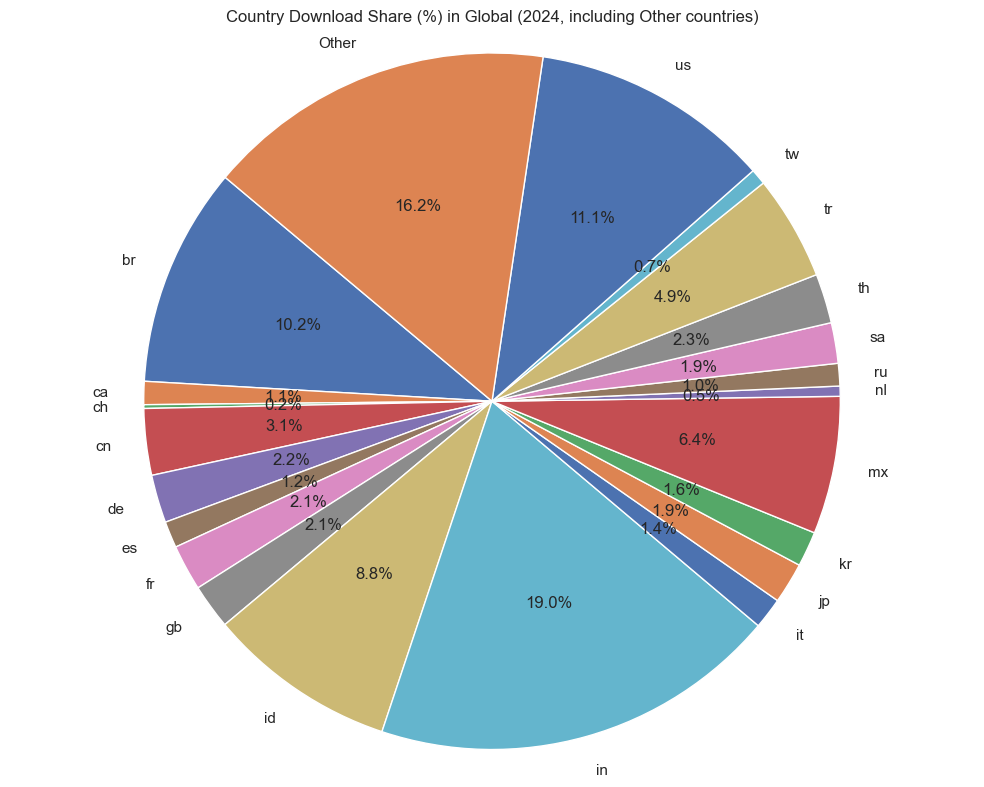

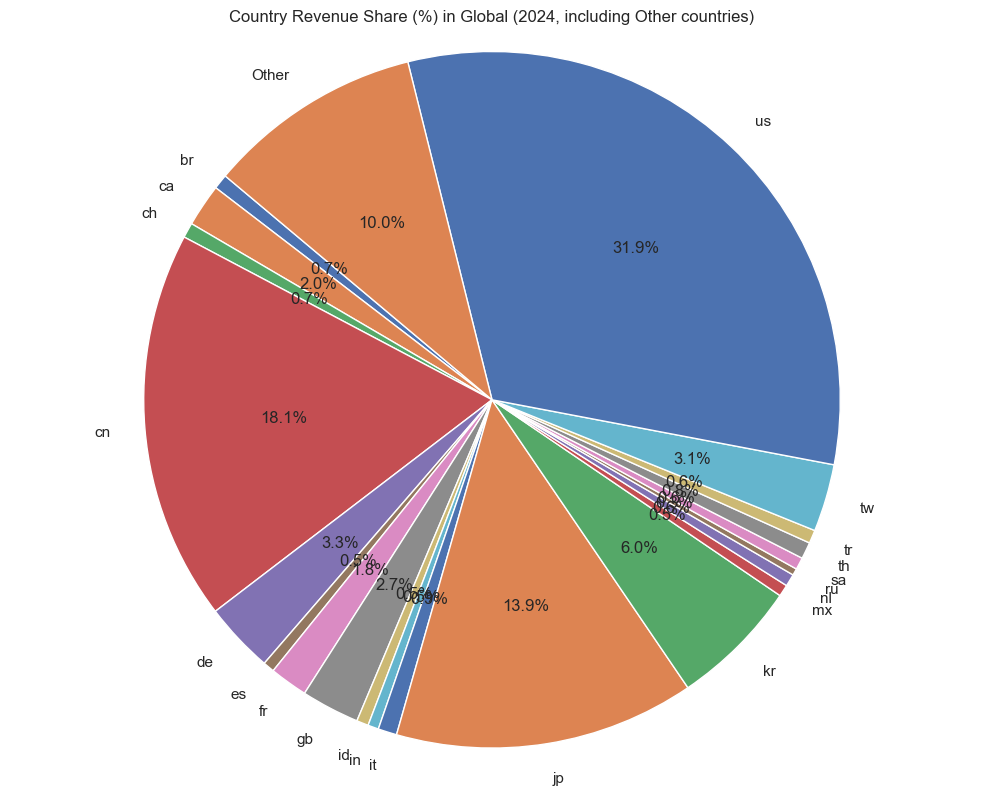

In [12]:
# # Construct data for other countries
latest_year_data = country_global_share[country_global_share['Year'] == latest_year].copy()
other_download_share = 100 - latest_year_data['Country Download Share (%)'].sum()
other_revenue_share = 100 - latest_year_data['Country Revenue Share (%)'].sum()
latest_year_data = pd.concat([
    latest_year_data,
    pd.DataFrame({
        'Country': ['Other'],
        'Country Download Share (%)': [other_download_share],
        'Country Revenue Share (%)': [other_revenue_share]
    })
], ignore_index=True)

# Pie chart showing the global share of downloads by country in 2024 (including other countries)
plt.figure(figsize=(10, 8))
plt.pie(latest_year_data['Country Download Share (%)'], labels=latest_year_data['Country'], autopct='%1.1f%%', startangle=140)
plt.title('Country Download Share (%) in Global (2024, including Other countries)')
plt.axis('equal')
plt.tight_layout()
plt.show()

# Pie chart showing the global share of each country's revenue in 2024 (including other countries)
plt.figure(figsize=(10, 8))
plt.pie(latest_year_data['Country Revenue Share (%)'], labels=latest_year_data['Country'], autopct='%1.1f%%', startangle=140)
plt.title('Country Revenue Share (%) in Global (2024, including Other countries)')
plt.axis('equal')
plt.tight_layout()
plt.show()


   Country  gdp_2024_billion_usd  GDP Rank  Revenue (Absolute, $)  \
0       br                  2176      10.0           3.949682e+08   
1       ca                  2189       9.0           1.126704e+09   
2       ch                   999      19.0           3.958838e+08   
3       cn                 18533       2.0           1.030788e+10   
4       de                  4591       3.0           1.857998e+09   
5       es                  1647      14.0           3.006989e+08   
6       fr                  3131       7.0           1.005067e+09   
7       gb                  3495       6.0           1.539420e+09   
8       id                  1475      15.0           3.125260e+08   
9       in                  4105       5.0           2.830162e+08   
10      it                  2406       8.0           4.952388e+08   
11      jp                  4110       4.0           7.919844e+09   
12      kr                  1899      13.0           3.404450e+09   
13      mx                  2017  

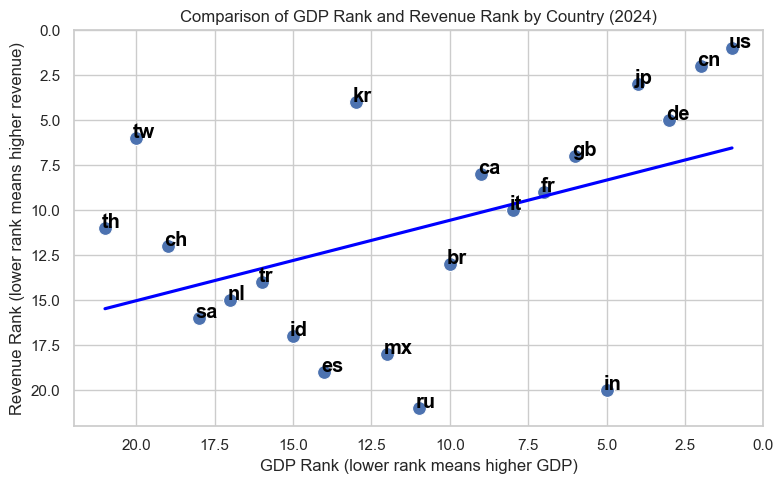

Spearman correlation (GDP rank vs Revenue rank): 0.45


In [13]:
# load GDP data
gdp_data = pd.read_csv(r"C:\Users\selma\Desktop\game_trend\country_gdp.csv")

# revenue vs GDP in 2024
latest_year = country_yearly['Year'].max()
latest_revenue_gdp = country_global_share[country_global_share['Year'] == latest_year][['Country', 'Revenue (Absolute, $)', 'Country Revenue Share (%)']]
latest_revenue_gdp = latest_revenue_gdp.merge(gdp_data, left_on='Country', right_on='country_code', how='left')

latest_revenue_gdp['GDP Rank'] = latest_revenue_gdp['gdp_2024_billion_usd'].rank(ascending=False)
latest_revenue_gdp['Revenue Rank'] = latest_revenue_gdp['Revenue (Absolute, $)'].rank(ascending=False)

# display data
print(latest_revenue_gdp[['Country', 'gdp_2024_billion_usd', 'GDP Rank', 'Revenue (Absolute, $)', 'Revenue Rank']])

# scatter plot
plt.figure(figsize=(8, 5))
ax = sns.scatterplot(data=latest_revenue_gdp, x='GDP Rank', y='Revenue Rank', s=100)

for line in range(0, latest_revenue_gdp.shape[0]):
     plt.text(latest_revenue_gdp['GDP Rank'].iloc[line] + 0.1,
              latest_revenue_gdp['Revenue Rank'].iloc[line],
              latest_revenue_gdp['Country'].iloc[line],
              horizontalalignment='left',
              size='large', color='black', weight='semibold')

sns.regplot(data=latest_revenue_gdp, x='GDP Rank', y='Revenue Rank', scatter=False, ci=None, line_kws={"color":"blue"})

plt.title('Comparison of GDP Rank and Revenue Rank by Country (2024)')
plt.xlabel('GDP Rank (lower rank means higher GDP)')
plt.ylabel('Revenue Rank (lower rank means higher revenue)')
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Calculate the Spearman correlation coefficient between GDP and income ranking
correlation = latest_revenue_gdp[['GDP Rank', 'Revenue Rank']].corr(method='spearman').iloc[0, 1]
print(f"Spearman correlation (GDP rank vs Revenue rank): {correlation:.2f}")

### 📈 Discussion: Relationship Between App Revenue and National GDP

The overall trend (represented by the **blue trend line** in the chart) shows that countries with **larger GDPs tend to have higher mobile app revenue**, indicating a **moderate positive correlation** (Spearman correlation coefficient = **0.45**).  
However, several countries deviate significantly from the trend line and are worth highlighting.


#### 🚩 Countries Performing Strongly in Both GDP and Revenue

- **United States (US)** and **China (CN)**  
  These two countries rank **1st and 2nd** in GDP respectively, and they also occupy the **top two positions in app revenue**.  
  This alignment suggests that the **large user base and strong spending power** driven by economic scale contribute significantly to mobile app market growth.

- **Japan (JP)** and **Germany (DE)**  
  Both countries show a close match between GDP and app revenue rankings — Japan ranks **3rd** in both, Germany ranks **4th** in both.  
  This reflects **mature markets** with strong **user willingness to pay**, consistent with their economic development levels.


#### ⚠️ Countries Significantly Above the Trend Line (Higher Revenue Than GDP Suggests)

- **South Korea (KR)**  
  Although not high in GDP rankings, Korea ranks **5th in app revenue**, far above what its GDP would suggest.  
  Possible reasons include a **highly developed gaming industry**, a **mobile-first culture**, **high internet penetration**, and strong **user monetization behavior**.

- **Taiwan (TW)**  
  Despite a relatively low GDP ranking, Taiwan ranks around **7th in revenue**, showing a **mature mobile gaming market** with strong user payment habits.


#### ⚠️ Countries Significantly Below the Trend Line (Lower Revenue Than GDP Suggests)

- **India (IN)**  
  India ranks around **5th in GDP**, but ranks **near the bottom in app revenue**.  
  This may be due to **low ARPU**, limited user willingness to pay, and lower **payment penetration**, despite the country’s massive population.

- **Russia (RU)**  
  Although it ranks **8th in GDP**, Russia is near the bottom in revenue rankings.  
  Potential reasons include economic challenges, regulatory issues, and low user purchasing power.

- **Spain (ES)** and **Mexico (MX)**  
  Similar to India and Russia, these countries have relatively high GDPs but **underperform in app revenue**, possibly due to **low user monetization**.


#### 🔍 Middle Zone (Aligned With Trend Line)

- **United Kingdom (GB)**, **France (FR)**, **Canada (CA)**, and **Italy (IT)**  
  These developed countries show a strong match between GDP and app revenue rankings, suggesting their **market size is well-aligned with economic scale**, and they possess **stable and mature app markets**.


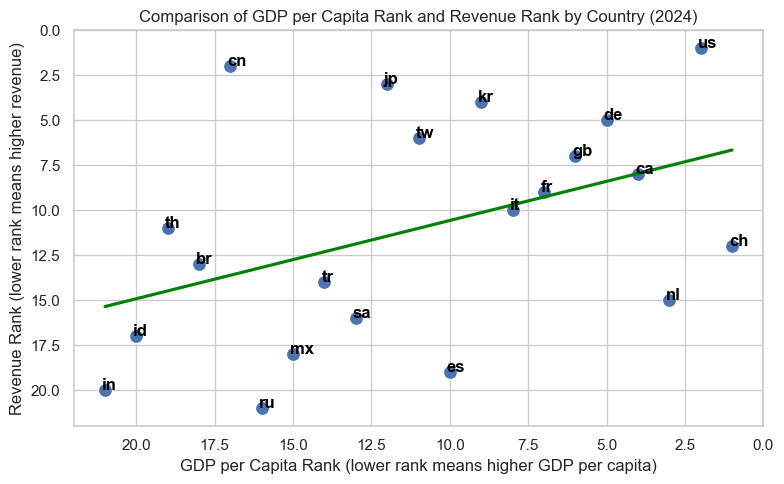

Spearman correlation (GDP per capita rank vs Revenue rank): 0.44


In [14]:
# Load GDP per capita data
gdp_per_capita_data = pd.read_csv(r"C:\Users\selma\Desktop\game_trend\country_gdp_per_capita.csv")
latest_revenue_gdp_per_capita = latest_revenue_gdp.merge(gdp_per_capita_data, left_on='Country', right_on='country_code', how='left')

# Comparison of GDP per capita and revenue ranking
latest_revenue_gdp_per_capita['GDP per Capita Rank'] = latest_revenue_gdp_per_capita['gdp_per_capita_2024_usd'].rank(ascending=False)

# Draw a scatter plot
plt.figure(figsize=(8, 5))
ax = sns.scatterplot(data=latest_revenue_gdp_per_capita, x='GDP per Capita Rank', y='Revenue Rank', s=100)

for line in range(0, latest_revenue_gdp_per_capita.shape[0]):
     plt.text(latest_revenue_gdp_per_capita['GDP per Capita Rank'].iloc[line] + 0.1,
              latest_revenue_gdp_per_capita['Revenue Rank'].iloc[line],
              latest_revenue_gdp_per_capita['Country'].iloc[line],
              horizontalalignment='left',
              size='medium', color='black', weight='semibold')

sns.regplot(data=latest_revenue_gdp_per_capita, x='GDP per Capita Rank', y='Revenue Rank', scatter=False, ci=None, line_kws={"color":"green"})

plt.title('Comparison of GDP per Capita Rank and Revenue Rank by Country (2024)')
plt.xlabel('GDP per Capita Rank (lower rank means higher GDP per capita)')
plt.ylabel('Revenue Rank (lower rank means higher revenue)')
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Calculate the Spearman correlation coefficient
correlation_pc = latest_revenue_gdp_per_capita[['GDP per Capita Rank', 'Revenue Rank']].corr(method='spearman').iloc[0, 1]
print(f"Spearman correlation (GDP per capita rank vs Revenue rank): {correlation_pc:.2f}")


# 📌 PART 2： Country Clustering

Next, we conducted country-level clustering analysis using two sets of features:

- Historical Download and Revenue Data (2020–2024):
We applied three clustering methods — K-Means, Hierarchical Clustering, and DBSCAN — to group countries based on their total downloads and revenue over the past five years.

- Aggregated Genre Data by Country in 2024:
We performed clustering using K-Means based on the genre distribution of game revenue and downloads for each country in 2024. To visualize the clustering results, we used Principal Component Analysis (PCA).



## Country Clustering approach #1: 
- By 5-year trends in downloads and revenue per country

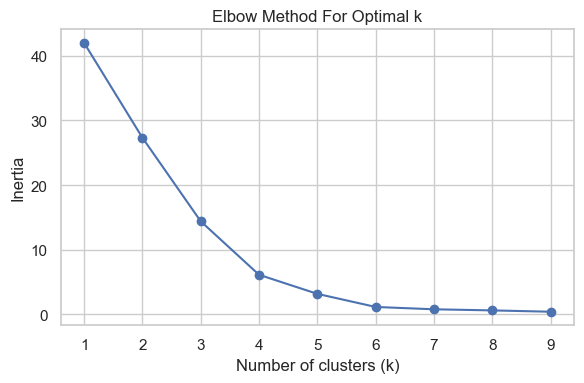

In [15]:
# load data
summary_df = pd.read_csv('21_countries_5year_summary.csv')

summary_total = summary_df.groupby('Country').agg({
    'Downloads (Absolute)': 'sum',
    'Revenue (Absolute, $)': 'sum'
}).reset_index()

# Standardized features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(summary_total[['Downloads (Absolute)', 'Revenue (Absolute, $)']])

# Determining the optimal number of clusters using the Elbow Method
inertia = []
k_range = range(1, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Drawing Elbow Curve
plt.figure(figsize=(6, 4))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid(True)
plt.tight_layout()
plt.show()

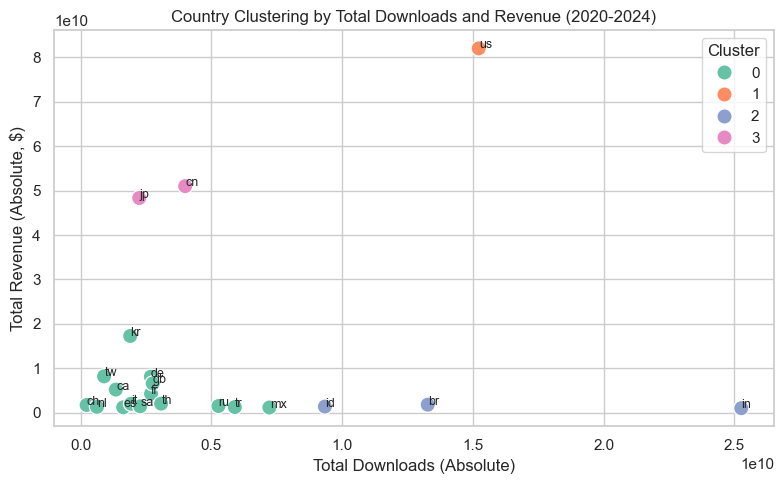

In [16]:
# KMeans clustering (select k=4)
kmeans = KMeans(n_clusters=4, random_state=42)
summary_total['Cluster'] = kmeans.fit_predict(scaled_features)

# Visualizing clustering results
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x='Downloads (Absolute)', y='Revenue (Absolute, $)',
    hue='Cluster', data=summary_total, palette='Set2', s=120)

for i in range(summary_total.shape[0]):
    plt.text(
        summary_total['Downloads (Absolute)'][i]+1e7,
        summary_total['Revenue (Absolute, $)'][i],
        summary_total['Country'][i],
        fontsize=9)

plt.title('Country Clustering by Total Downloads and Revenue (2020-2024)')
plt.xlabel('Total Downloads (Absolute)')
plt.ylabel('Total Revenue (Absolute, $)')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()


### 🌍 Country Market Clustering Results (2020–2024)

| Cluster ID | Cluster Name              | Representative Countries            | Description                                                                 |
|------------|---------------------------|--------------------------------------|-----------------------------------------------------------------------------|
| Cluster 1  | **Global Titans**         | 🇺🇸 United States (US)               | Ranked No.1 globally in both downloads and revenue; well-developed ecosystem with both a large user base and strong purchasing power. |
| Cluster 3  | **Revenue Giants**        | 🇨🇳 China (CN), 🇯🇵 Japan (JP)        | Extremely high revenue, strong user willingness to pay, and mature mobile gaming culture; download volume not as high as mass-market countries. |
| Cluster 2  | **Mass Market Movers**    | 🇮🇳 India (IN), 🇧🇷 Brazil (BR), 🇮🇩 Indonesia (ID) | Massive download volumes but relatively low revenue; limited user spending power and habits; mainly ad-driven monetization. |
| Cluster 0  | **Balanced Performers**   | 🇰🇷 South Korea (KR), 🇩🇪 Germany (DE), 🇬🇧 United Kingdom (GB), etc. | Medium to high performance in both downloads and revenue; mature and stable markets with good user monetization but smaller scale than the "giants." |


### Country Clustering by Hierarchical Method

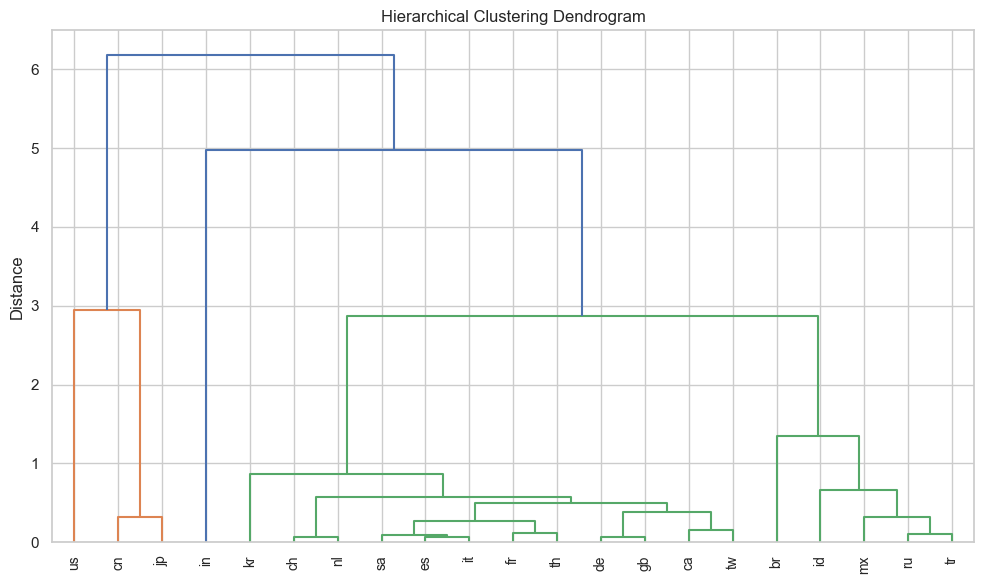

In [17]:
# Load and summarize data again if needed
summary_df = pd.read_csv('21_countries_5year_summary.csv')

summary_total = summary_df.groupby('Country').agg({
    'Downloads (Absolute)': 'sum',
    'Revenue (Absolute, $)': 'sum'
}).reset_index()


from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.preprocessing import StandardScaler

# Standardize again if not already available in this cell
scaler = StandardScaler()
scaled_features = scaler.fit_transform(summary_total[['Downloads (Absolute)', 'Revenue (Absolute, $)']])


# Perform hierarchical clustering
linked = linkage(scaled_features, method='ward')  # method: ward, average, complete

# Draw dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linked, labels=summary_total['Country'].values, leaf_rotation=90)
plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

# Cut the dendrogram at 4 clusters
summary_total['Cluster_Hier'] = fcluster(linked, t=4, criterion='maxclust')


### Country Clustering by DBSCAN Method¶

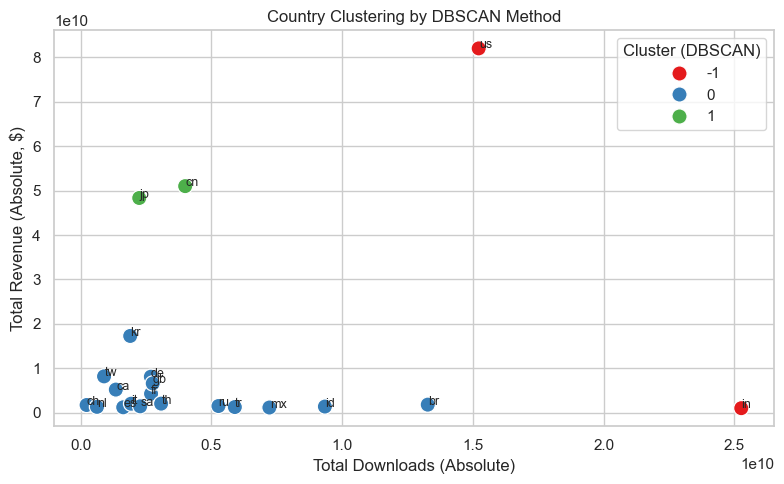

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Recompute summary_total if not already defined
summary_df = pd.read_csv('21_countries_5year_summary.csv')
summary_total = summary_df.groupby('Country').agg({
    'Downloads (Absolute)': 'sum',
    'Revenue (Absolute, $)': 'sum'
}).reset_index()

# 2. Standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(summary_total[['Downloads (Absolute)', 'Revenue (Absolute, $)']])

# 3. Apply DBSCAN
dbscan = DBSCAN(eps=1.2, min_samples=2)  # You can adjust eps for better separation
summary_total['Cluster_DBSCAN'] = dbscan.fit_predict(scaled_features)

# 4. Visualize DBSCAN results
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x='Downloads (Absolute)', y='Revenue (Absolute, $)',
    hue='Cluster_DBSCAN', data=summary_total, palette='Set1', s=120)

for i in range(summary_total.shape[0]):
    plt.text(
        summary_total['Downloads (Absolute)'][i] + 1e7,
        summary_total['Revenue (Absolute, $)'][i],
        summary_total['Country'][i],
        fontsize=9
    )

plt.title('Country Clustering by DBSCAN Method')
plt.xlabel('Total Downloads (Absolute)')
plt.ylabel('Total Revenue (Absolute, $)')
plt.legend(title='Cluster (DBSCAN)')
plt.tight_layout()
plt.show()


## Country Clustering approach #2
- By aggregated genre data for each country in 2024

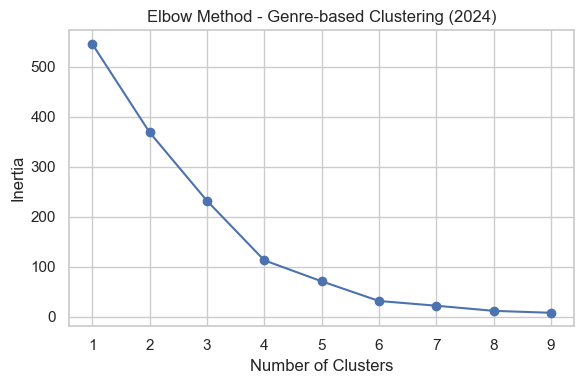

Game Genre  Cluster
Country            
br                2
ca                0
ch                0
cn                3
de                0
es                0
fr                0
gb                0
id                2
in                2
it                0
jp                3
kr                0
mx                0
nl                0
ru                0
sa                0
th                0
tr                0
tw                0
us                1


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import glob
import os

sns.set(style='whitegrid')

# import data
data_path = r"C:\Users\selma\Desktop\game_trend\country"
file_list = glob.glob(os.path.join(data_path, '*_2024.csv'))

# handle file only in year 2024
genre_data = pd.DataFrame()
for file in file_list:
    if '_2024' in file:
        temp_df = pd.read_csv(file, encoding='utf-16', sep='\t')
        country_code = os.path.basename(file).split('_')[0]
        temp_df['Country'] = country_code
        genre_data = pd.concat([genre_data, temp_df], ignore_index=True)

# Aggregate download and revenue data for each country and genre
genre_grouped = genre_data.groupby(['Country', 'Game Genre']).agg({
    'Downloads (Absolute)': 'sum',
    'Revenue (Absolute, $)': 'sum'
}).reset_index()

# Pivot table: each row is a country, each column is the downloads or revenue of a different genre
download_pivot = genre_grouped.pivot(index='Country', columns='Game Genre', values='Downloads (Absolute)').fillna(0)
revenue_pivot = genre_grouped.pivot(index='Country', columns='Game Genre', values='Revenue (Absolute, $)').fillna(0)

# Combine download and revenue features (choose one or both)
features = pd.concat([download_pivot, revenue_pivot], axis=1, sort=False)

# standardization
genre_scaler = StandardScaler()
features_scaled = genre_scaler.fit_transform(features)

# Elbow Method
inertia = []
k_range = range(1, 10)
for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(features_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method - Genre-based Clustering (2024)')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid(True)
plt.tight_layout()
plt.show()

# Cluster analysis (assuming k=4)
kmeans = KMeans(n_clusters=4, random_state=42)
genre_cluster_labels = kmeans.fit_predict(features_scaled)

# Save clustering results
genre_cluster_df = features.copy()
genre_cluster_df['Cluster'] = genre_cluster_labels
print(genre_cluster_df[['Cluster']])


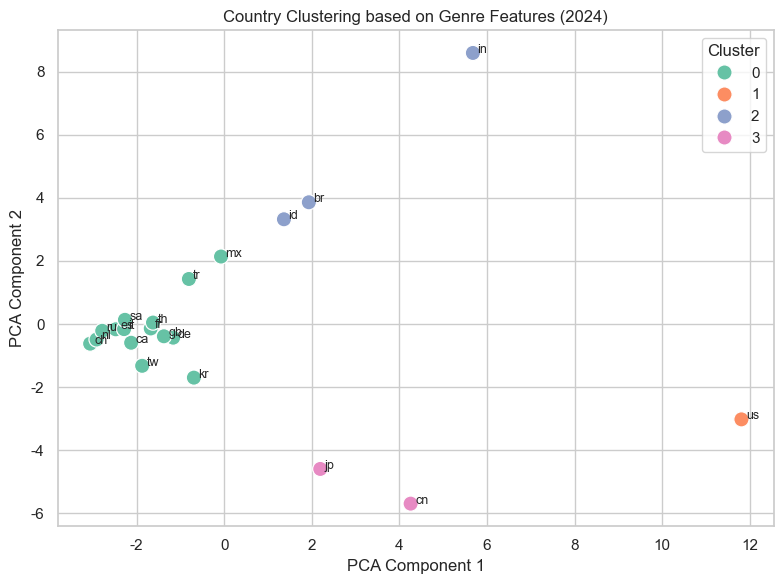

In [20]:
# # Visualization of clustering results (using the first two principal components for dimensionality reduction display)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=pca_result[:, 0],
    y=pca_result[:, 1],
    hue=genre_cluster_labels,
    palette='Set2',
    s=120
)

for i, country in enumerate(features.index):
    plt.text(pca_result[i, 0] + 0.1, pca_result[i, 1], country, fontsize=9)

plt.title('Country Clustering based on Genre Features (2024)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

### 🎯 Differences in Genre Revenue Structure Across Clusters (Based on 2024 Data)

| Cluster   | Cluster Name       | Keywords             | Key Characteristics |
|-----------|--------------------|----------------------|----------------------|
| Cluster 0 | 🟦 Balanced Medium | Diverse but Mild     | Performance across all genres is relatively weak, with genre revenues clustered near the center. This indicates that countries in this group lack a distinct advantage in any specific genre. The distribution is even, but lacks standout revenue generators. |
| Cluster 1 | 🟩 Revenue Giant   | Dominant Across the Board | Clearly represents the U.S. as a standalone category. Revenues for genres like Puzzle, Casino, Strategy, and RPG are significantly higher than those in other clusters, showcasing strong monetization capabilities and high user willingness to pay. |
| Cluster 2 | 🟨 Light Volume Hybrid | Wide but Weak     | Shows some strength in Shooter and Strategy genres, but overall revenue remains low. Likely includes developing markets such as India, Indonesia, and Brazil, which are characterized by high download volumes but low monetization. |
| Cluster 3 | 🟥 East Hardcore    | Focused Depth        | Primarily composed of China and Japan, showing peak revenues in RPG and Strategy genres. Other genres remain at moderate to low levels, indicating a highly concentrated revenue structure that aligns with the preference for hardcore gameplay in these markets. |

---

### 📌 Summary

- **Cluster 1 (U.S.)**: Exhibits overwhelming dominance across almost all genres, reflecting a highly mature monetization environment.  
- **Cluster 3 (China & Japan)**: Strong focus on core, hardcore genres; classic powerhouses in RPG/SLG.  
- **Cluster 2 (India, Brazil, Indonesia, etc.)**: High downloads in certain genres, but low revenue — fragile monetization structure.  
- **Cluster 0 (European countries)**: Balanced genre structure but lacks standout performance; user preferences are likely diverse, with below-average ARPU.


# 📌 PART 3： In-Depth Analysis of Key Countries

Next, we conducted an in-depth analysis of several representative countries identified in the clustering results.

## US 

In [21]:
# --- Import libraries and define shared functions ---
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib.ticker import LogFormatter

encoding = 'utf-16'
sep = '\t'
years = range(2020, 2025)

def load_summary(folder_path, country_code):
    summary_data = []
    for year in years:
        for platform in ['ios', 'gp']:
            file = f"{platform}_{year}_{country_code}.csv"
            path = os.path.join(folder_path, file)
            df = pd.read_csv(path, encoding=encoding, sep=sep, engine='python')
            downloads = df['Downloads (Absolute)'].sum()
            revenue = df['Revenue (Absolute, $)'].sum()
            summary_data.append({'Year': year, 'Platform': platform.upper(), 'Downloads': downloads, 'Revenue': revenue})
    return pd.DataFrame(summary_data)

def plot_pie_charts(summary_df):
    fig, axes = plt.subplots(2, 5, figsize=(20, 10))
    colors = ['#66c2a5', '#fc8d62']
    for idx, year in enumerate(years):
        df_year = summary_df[summary_df['Year'] == year]
        ax_download = axes[0, idx]
        ax_download.pie(df_year['Downloads'], labels=df_year['Platform'], autopct='%1.1f%%', startangle=140, colors=colors)
        ax_download.set_title(f"Downloads - {year}")
        ax_revenue = axes[1, idx]
        ax_revenue.pie(df_year['Revenue'], labels=df_year['Platform'], autopct='%1.1f%%', startangle=140, colors=colors)
        ax_revenue.set_title(f"Revenue - {year}")
    plt.tight_layout()
    plt.show()

def plot_trends(summary_df, country_label):
    plt.figure(figsize=(10, 5))
    sns.lineplot(data=summary_df, x='Year', y='Downloads', hue='Platform', marker='o')
    plt.ylim(bottom=0)
    plt.title(f"{country_label} - Yearly Downloads by Platform")
    plt.show()
    plt.figure(figsize=(10, 5))
    sns.lineplot(data=summary_df, x='Year', y='Revenue', hue='Platform', marker='o')
    plt.ylim(bottom=0)
    plt.title(f"{country_label} - Yearly Revenue by Platform")
    plt.show()

def genre_analysis_and_clustering(folder_path, file_name, country_label):
    path = os.path.join(folder_path, file_name)
    revenue_df = pd.read_csv(path, encoding=encoding, sep=sep, engine='python')
    revenue_df['Year'] = 2024
    genre_stats = revenue_df.groupby('Game Genre').agg({
        'Downloads (Absolute)': 'sum',
        'Revenue (Absolute, $)': 'sum'
    }).sort_values(by='Revenue (Absolute, $)', ascending=False)
    genre_stats['Download Share'] = genre_stats['Downloads (Absolute)'] / genre_stats['Downloads (Absolute)'].sum()
    genre_stats['Revenue Share'] = genre_stats['Revenue (Absolute, $)'] / genre_stats['Revenue (Absolute, $)'].sum()
    genre_stats[['Download Share', 'Revenue Share']].plot(kind='bar', figsize=(12, 6), title=f"{country_label} - Genre Shares")
    plt.show()
    revenue_df['revenue'] = pd.to_numeric(revenue_df['Revenue (Absolute, $)'], errors='coerce')
    features = revenue_df[['Average DAU (Absolute)', 'revenue']]
    valid_rows = features.notna().all(axis=1)
    features_clean = features[valid_rows].dropna()
    scaler = StandardScaler()
    X = scaler.fit_transform(features_clean)
    inertia = []
    for k in range(1, 10):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        inertia.append(kmeans.inertia_)
    plt.figure(figsize=(8, 4))
    plt.plot(range(1, 10), inertia, marker='o')
    plt.title(f'{country_label} - Elbow Method For Optimal k')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.show()
    k_optimal = 4
    kmeans = KMeans(n_clusters=k_optimal, random_state=42)
    clusters = kmeans.fit_predict(X)
    revenue_df.loc[valid_rows, 'Cluster'] = clusters
    plt.figure(figsize=(8, 6))
    ax = plt.gca()
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel("Average DAU (log scale)")
    ax.set_ylabel("Revenue (log scale)")
    ax.xaxis.set_major_formatter(LogFormatter())
    ax.yaxis.set_major_formatter(LogFormatter())
    sns.scatterplot(
        x='Average DAU (Absolute)', y='revenue',
        hue='Cluster', data=revenue_df, palette='Set2'
    )
    plt.title(f"{country_label} - Clustering by DAU & Revenue")
    plt.show()
    for c in range(k_optimal):
        print(f"Cluster {c} Sample Apps in {country_label}:")
        subset = revenue_df[revenue_df['Cluster'] == c]
        print(subset[['Unified Name', 'Average DAU (Absolute)', 'revenue']].head())
        print()


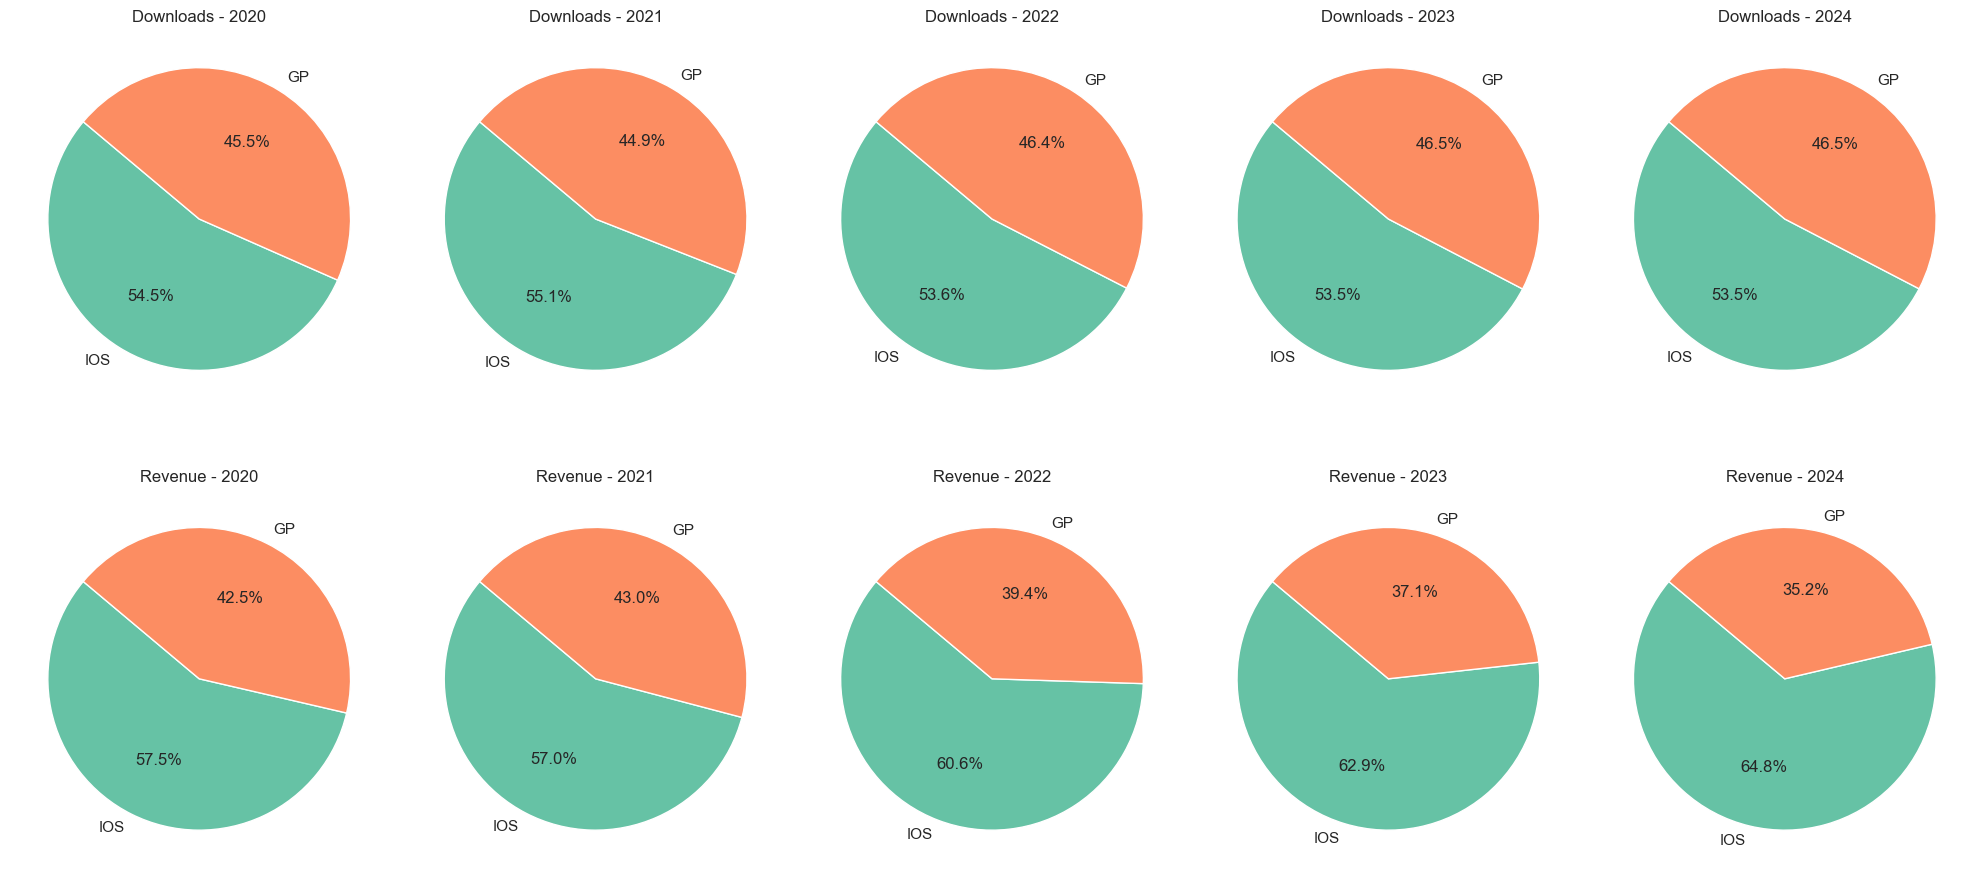

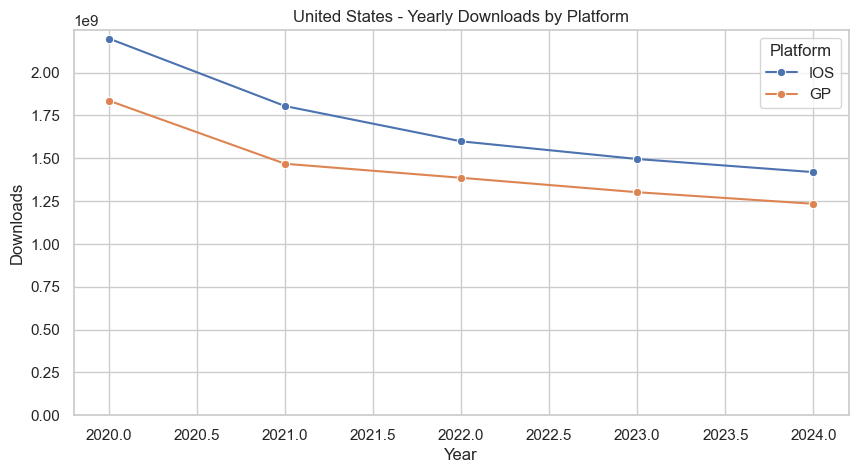

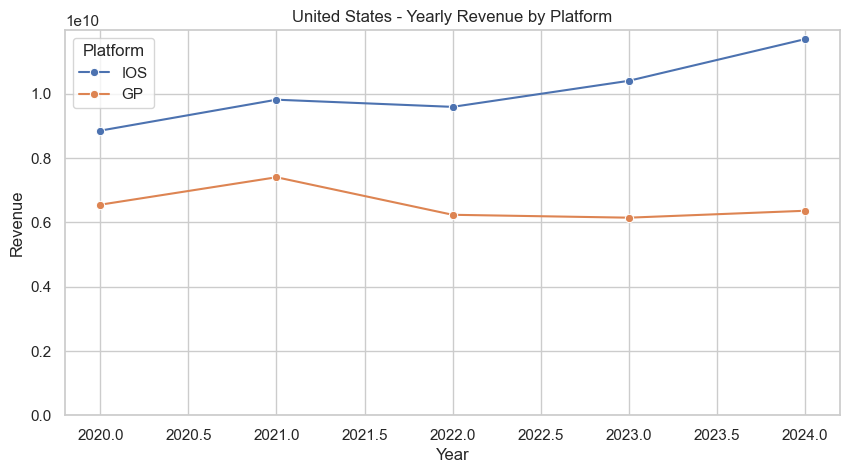

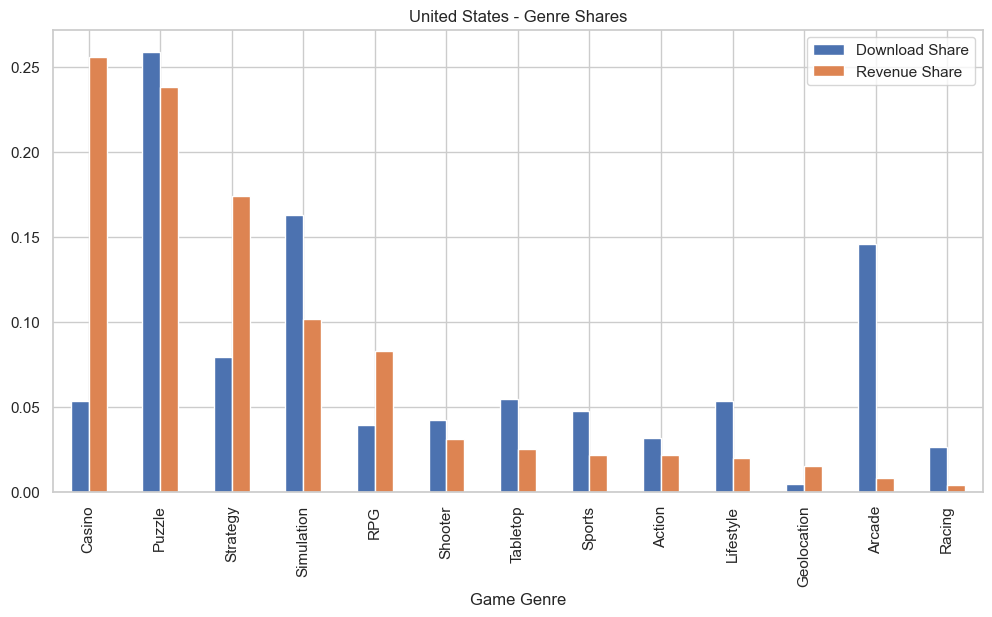

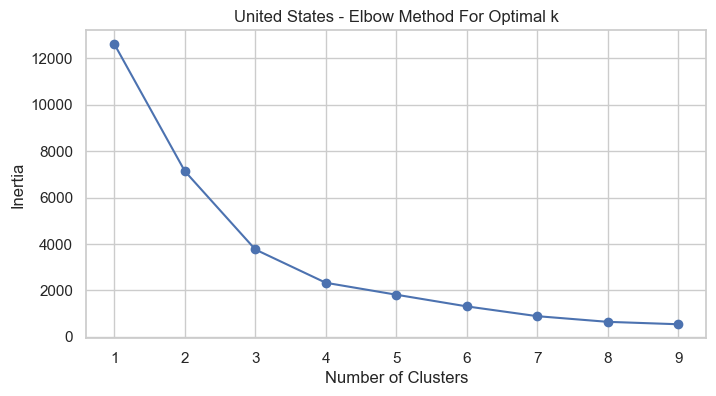

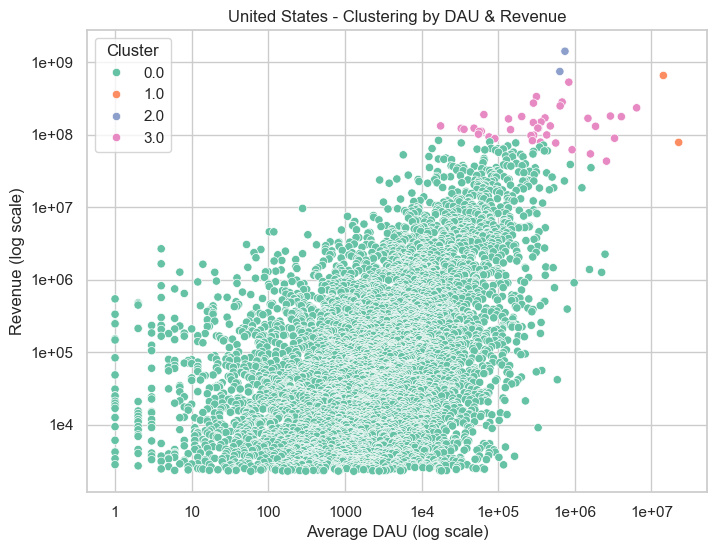

Cluster 0 Sample Apps in United States:
                    Unified Name  Average DAU (Absolute)      revenue
36  Big Fish Casino: Slots Games                 16645.0  83862456.66
38    Lotsa Slots - Casino Games                 77584.0  79710783.65
41              ドラゴンボールZ ドッカンバトル                169355.0  77282774.89
42   Cash Frenzy™ - Slots Casino                 32929.0  77261175.12
44              Project Makeover                390083.0  71999414.22

Cluster 1 Sample Apps in United States:
   Unified Name  Average DAU (Absolute)       revenue
2        Roblox              14285567.0  6.590851e+08
40      Discord              22643647.0  7.857400e+07

Cluster 2 Sample Apps in United States:
   Unified Name  Average DAU (Absolute)       revenue
0  MONOPOLY GO!                742918.0  1.423463e+09
1   Royal Match                637169.0  7.481743e+08

Cluster 3 Sample Apps in United States:
        Unified Name  Average DAU (Absolute)       revenue
3   Candy Crush Saga              

In [22]:
folder_path_us = r'C:\Users\selma\Desktop\game_trend\us'
summary_df_us = load_summary(folder_path_us, 'us')
plot_pie_charts(summary_df_us)
plot_trends(summary_df_us, "United States")
genre_analysis_and_clustering(folder_path_us, "revenue_2024_us.csv", "United States")


## Gemany

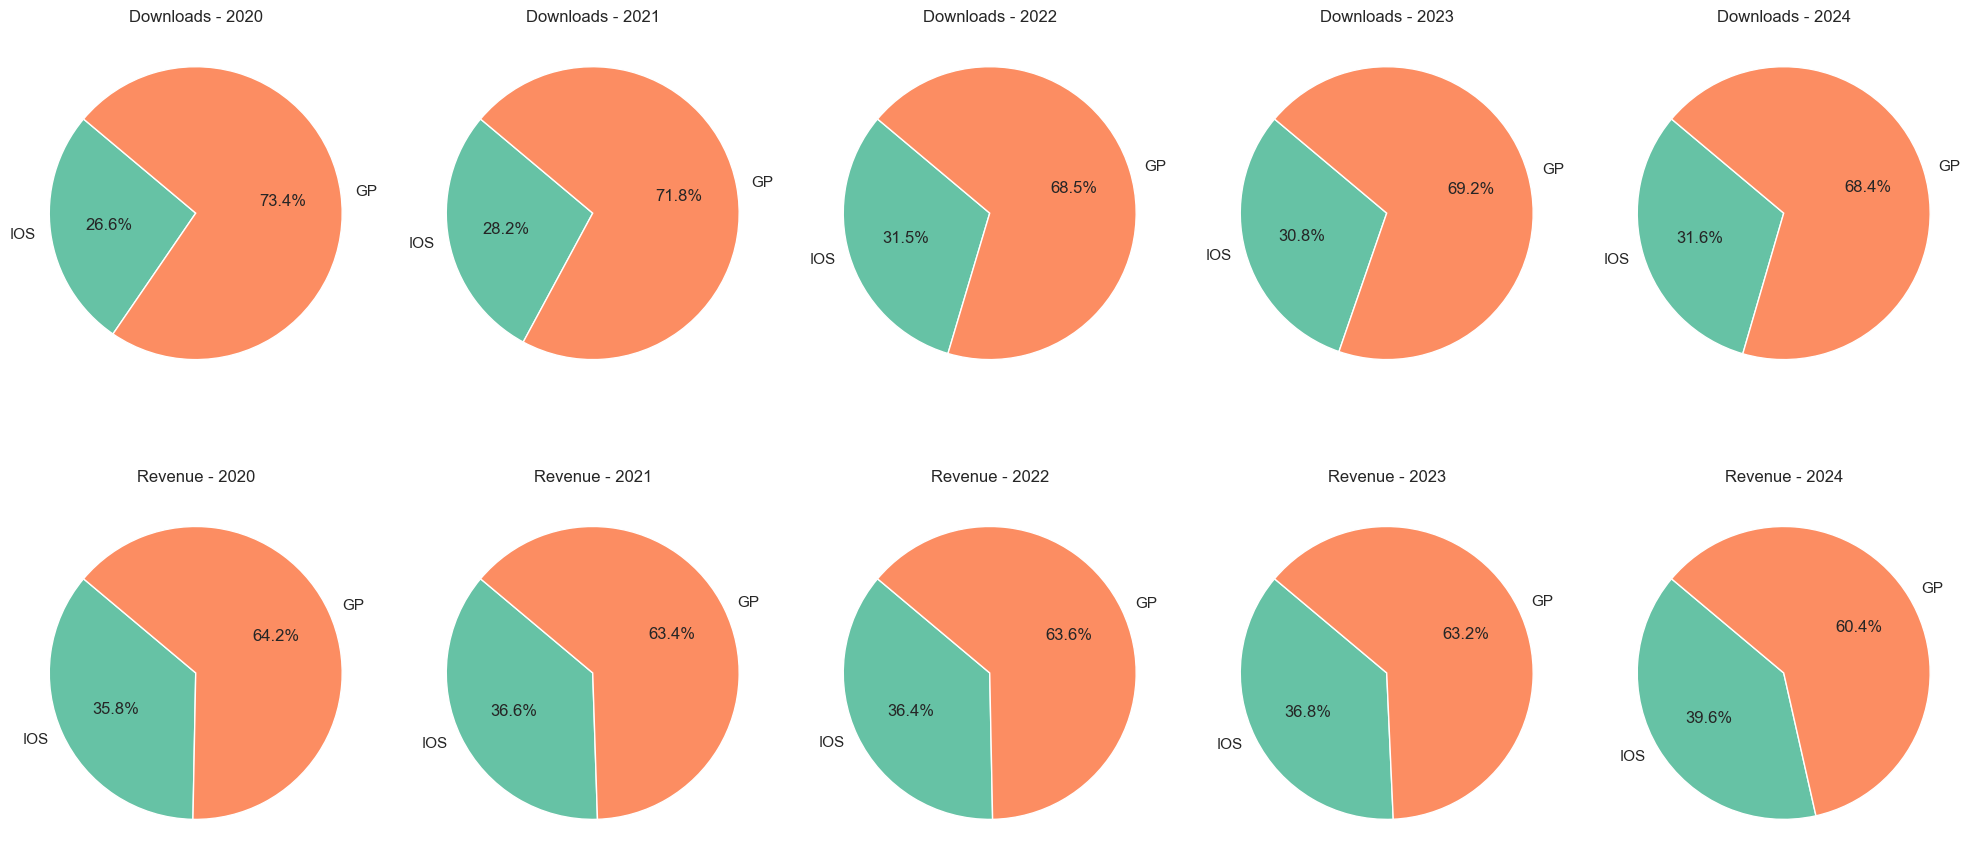

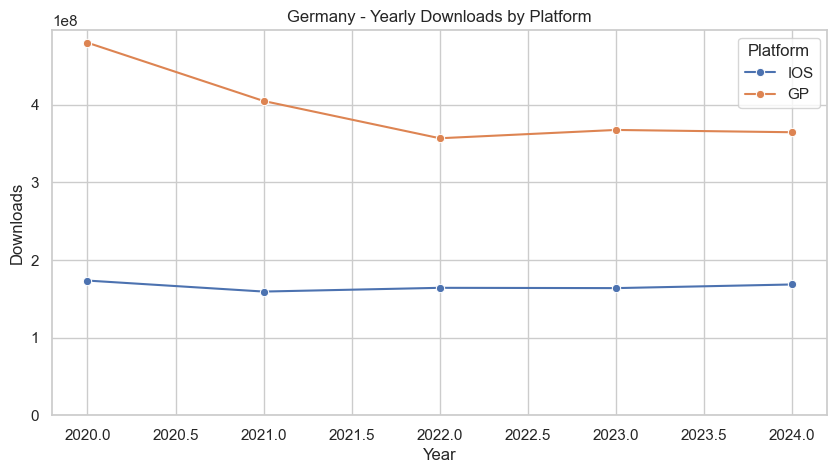

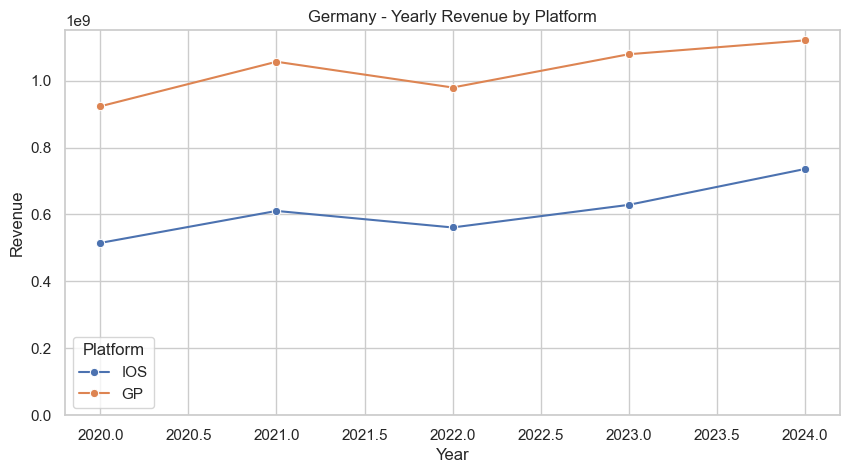

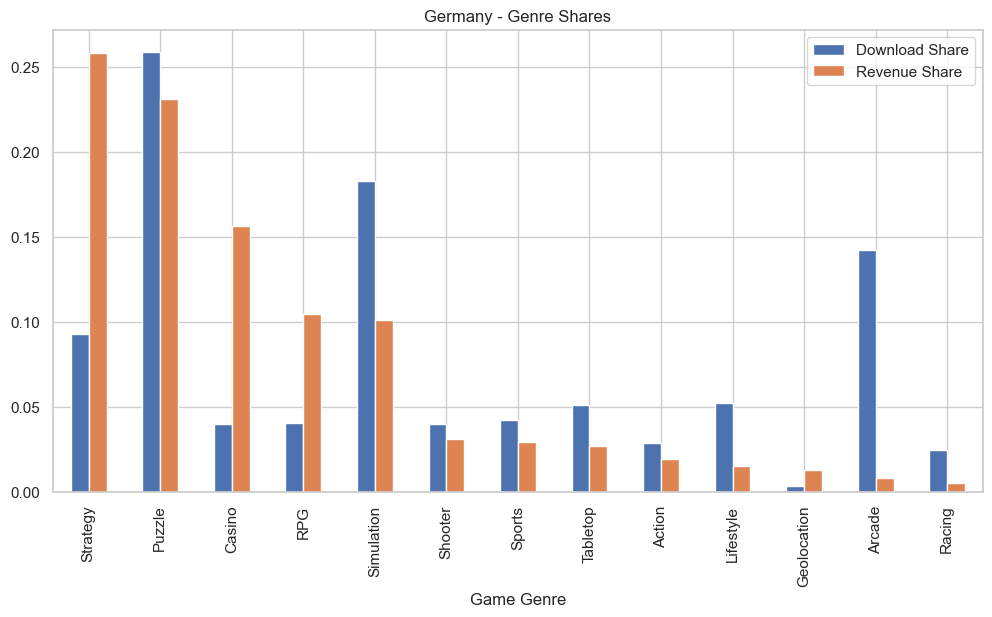

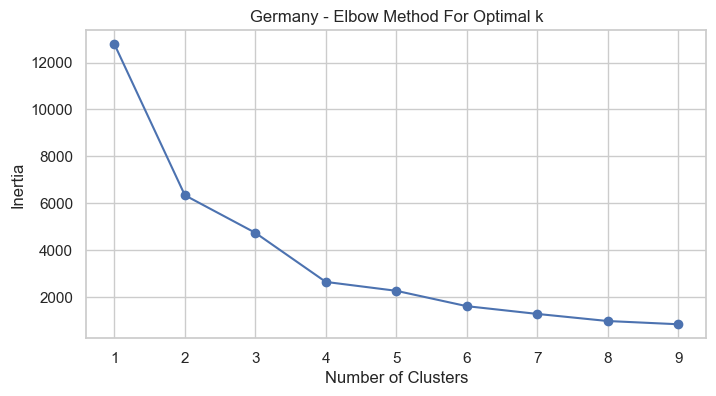

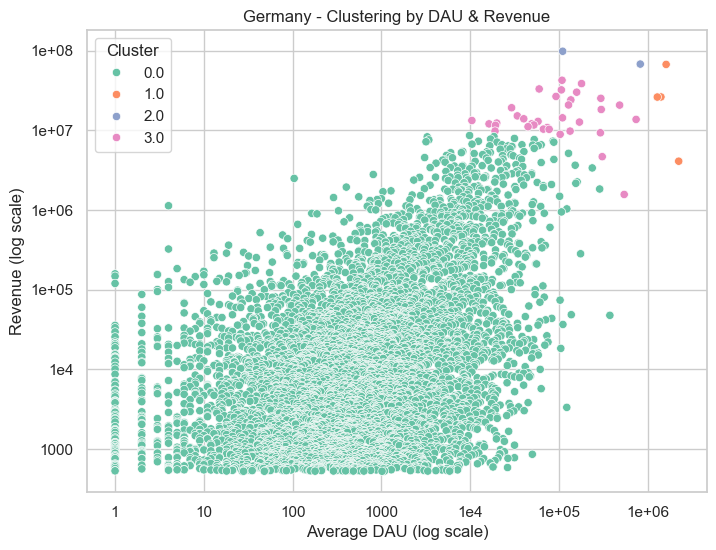

Cluster 0 Sample Apps in Germany:
                      Unified Name  Average DAU (Absolute)     revenue
37              Puzzles & Survival                  9833.0  8620728.87
38      Bingo Blitz™ - BINGO Games                 18510.0  8359724.79
39   Frost & Flame: King of Avalon                  3277.0  8291724.02
40  Top Eleven Be a Soccer Manager                 31469.0  7921925.11
41    Age of Origins:Tower Defense                 16933.0  7772946.16

Cluster 1 Sample Apps in Germany:
      Unified Name  Average DAU (Absolute)      revenue
2      Brawl Stars               1606798.0  67191989.75
9   Clash of Clans               1404274.0  26252054.27
10          Roblox               1278768.0  26173672.97
89         Discord               2226222.0   4102259.67

Cluster 2 Sample Apps in Germany:
  Unified Name  Average DAU (Absolute)      revenue
0  Coin Master                109884.0  98267560.87
1  Royal Match                822225.0  67833227.51

Cluster 3 Sample Apps in Germany:

In [23]:
folder_path_de = r'C:\Users\selma\Desktop\game_trend\de'
summary_df_de = load_summary(folder_path_de, 'de')
plot_pie_charts(summary_df_de)
plot_trends(summary_df_de, "Germany")
genre_analysis_and_clustering(folder_path_de, "revenue_2024_de.csv", "Germany")


## Brazil

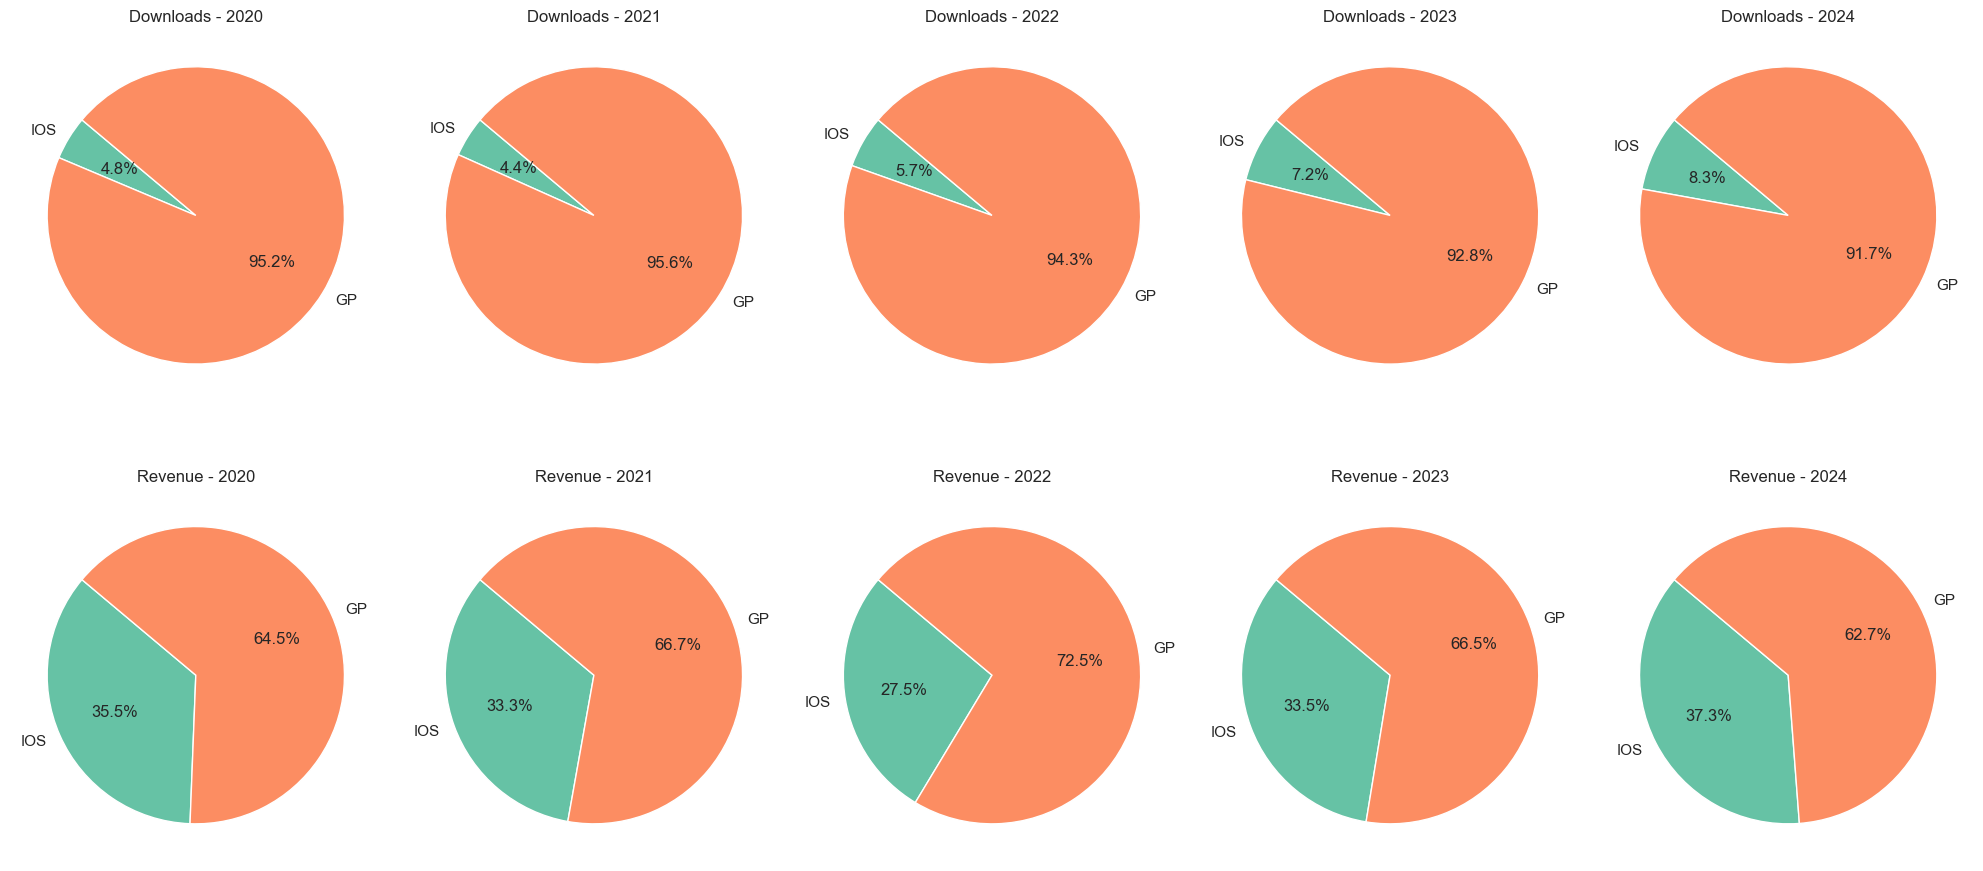

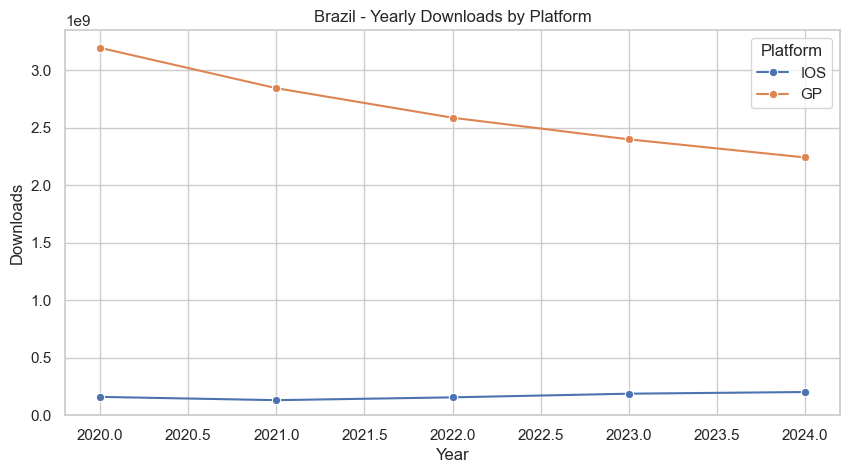

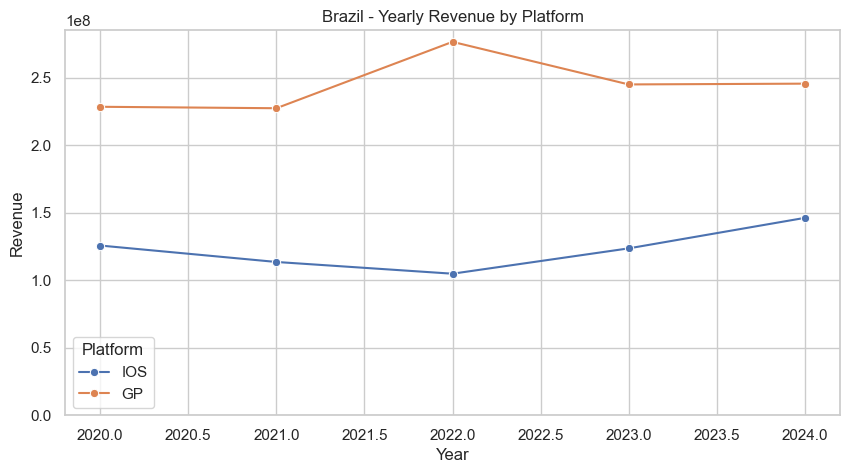

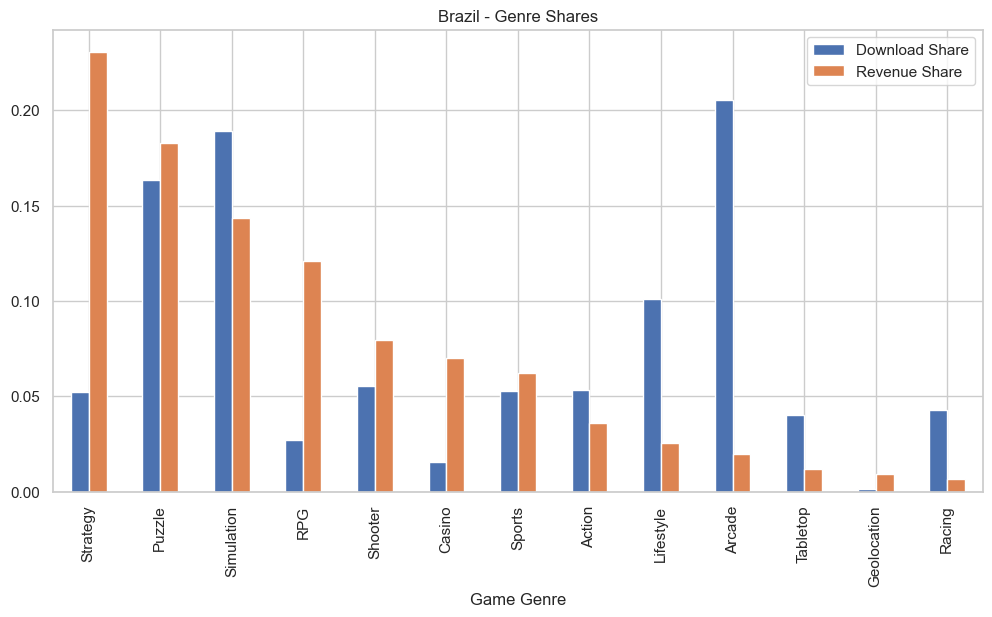

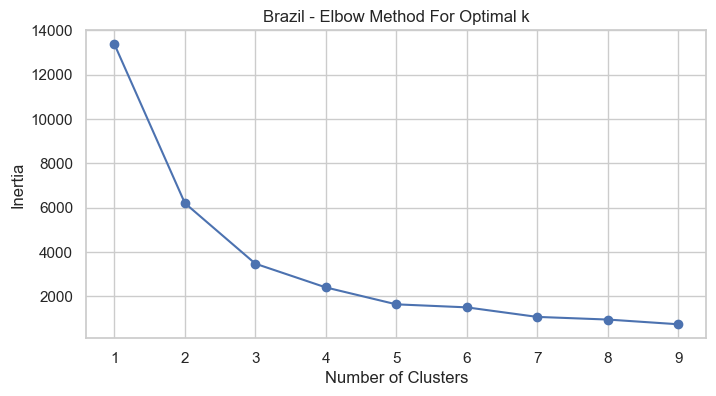

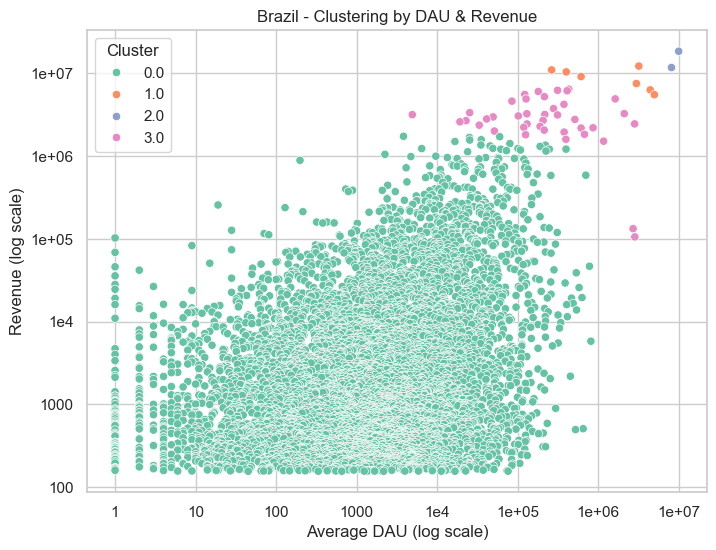

Cluster 0 Sample Apps in Brazil:
                      Unified Name  Average DAU (Absolute)     revenue
45                         나이트 크로우                  3815.0  1735299.12
46                    MONOPOLY GO!                 59762.0  1714666.36
47                 Diablo Immortal                 25088.0  1679424.60
49     Marvel Contest of Champions                 35220.0  1579165.69
50  Seaside Escape®: Merge & Story                 25357.0  1562158.48

Cluster 1 Sample Apps in Brazil:
       Unified Name  Average DAU (Absolute)      revenue
1       Brawl Stars               3190710.0  12234883.77
3       Coin Master                263553.0  10988257.22
4  Candy Crush Saga                400567.0  10406180.60
5       Royal Match                612045.0   9131658.39
6        eFootball™               2974693.0   7530630.61

Cluster 2 Sample Apps in Brazil:
       Unified Name  Average DAU (Absolute)      revenue
0            Roblox               9973100.0  18478202.65
2  Garena Free Fi

In [24]:
folder_path_br = r'C:\Users\selma\Desktop\game_trend\br'
summary_df_br = load_summary(folder_path_br, 'br')
plot_pie_charts(summary_df_br)
plot_trends(summary_df_br, "Brazil")
genre_analysis_and_clustering(folder_path_br, "revenue_2024_br.csv", "Brazil")


## Japan

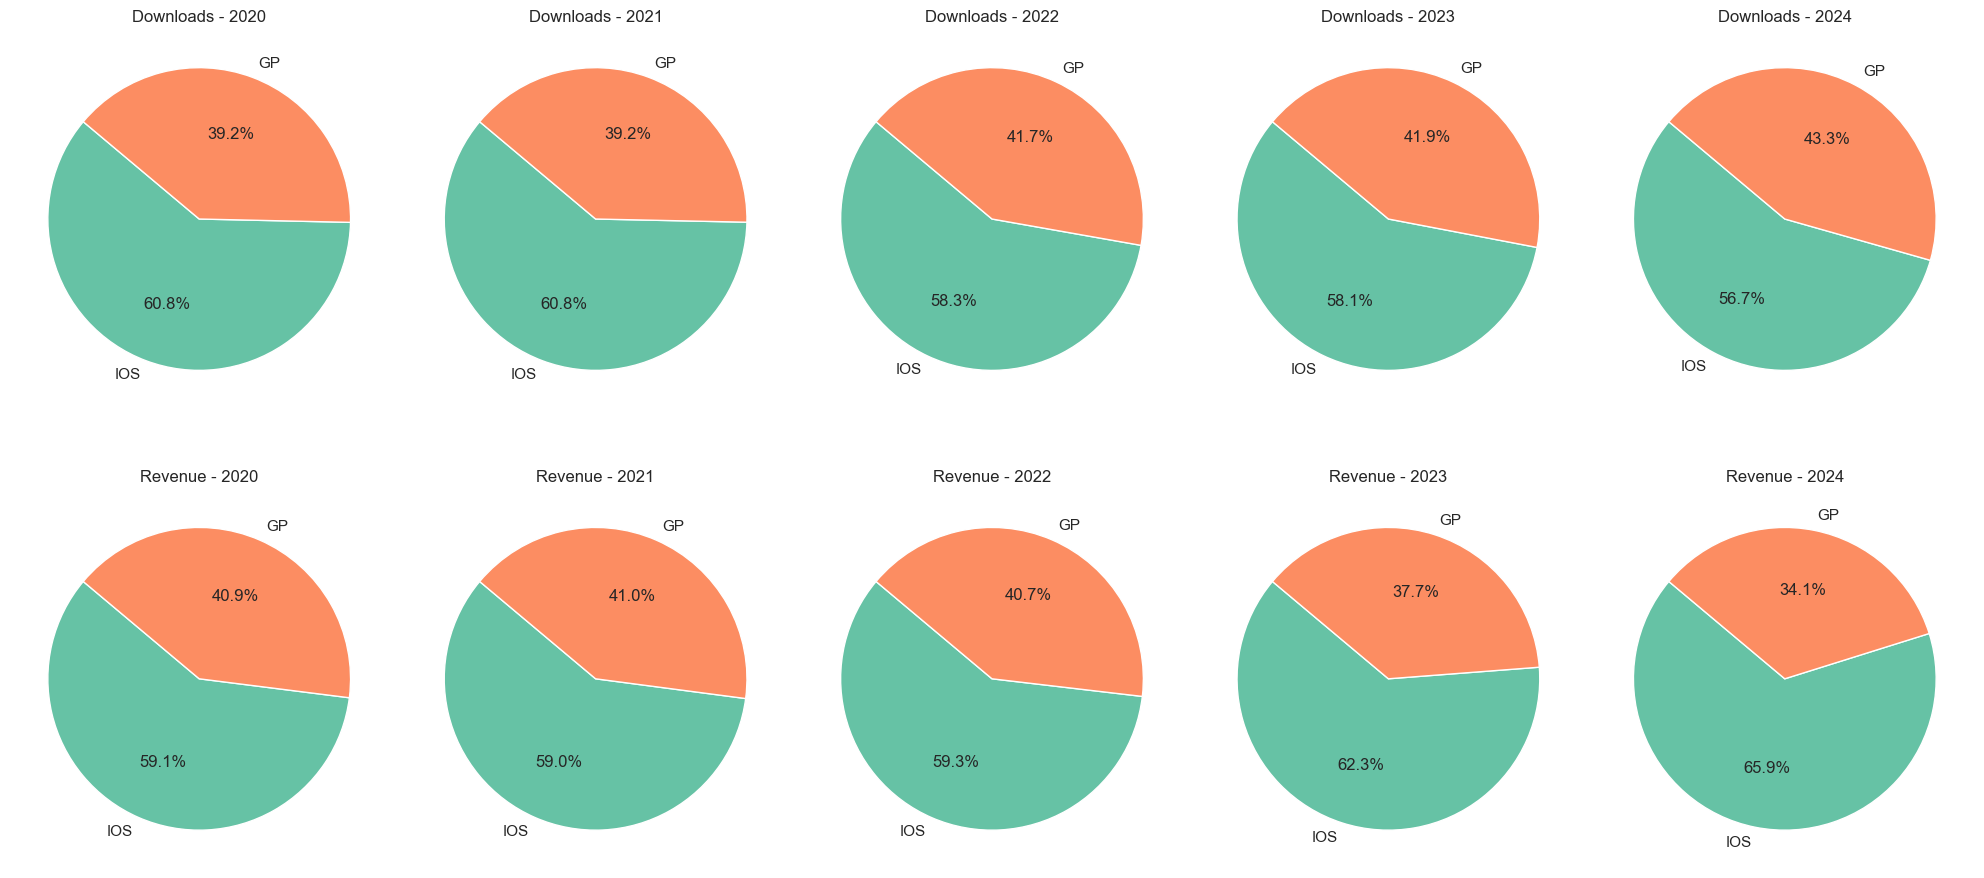

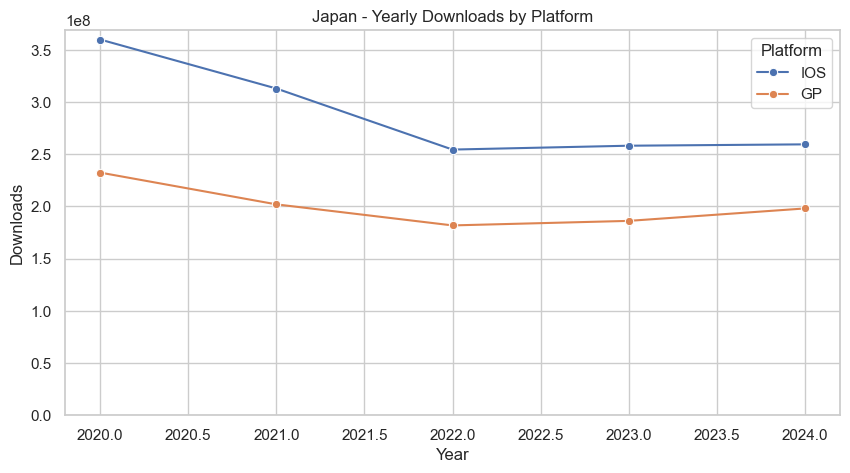

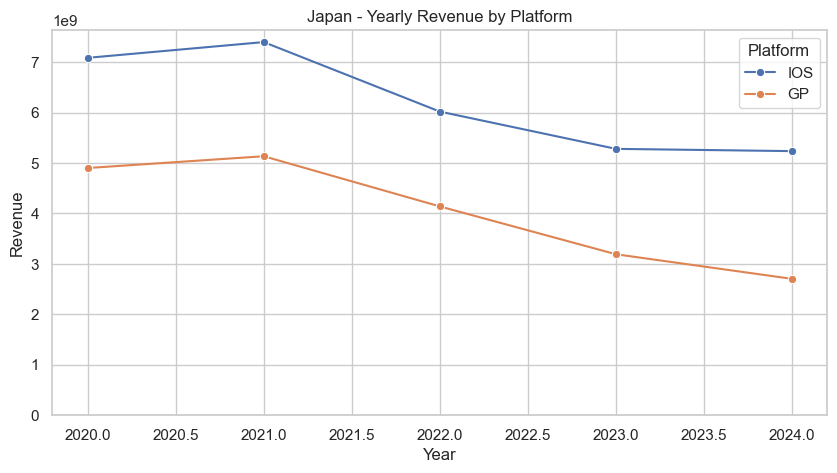

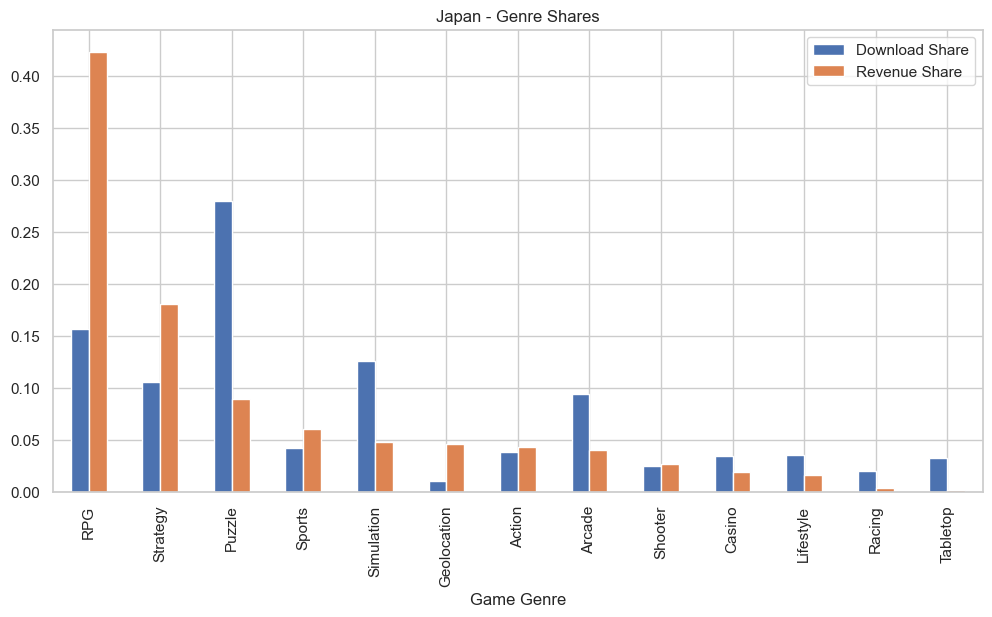

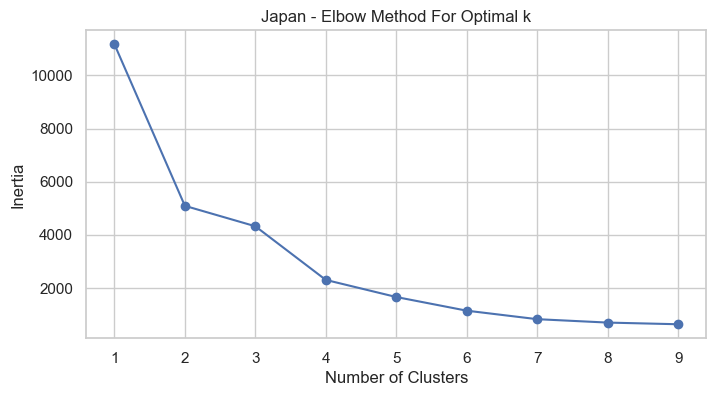

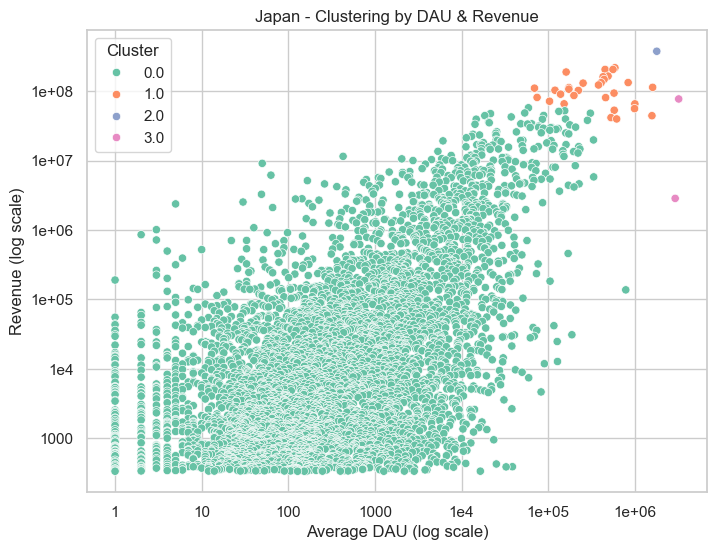

Cluster 0 Sample Apps in Japan:
         Unified Name  Average DAU (Absolute)      revenue
27  Zenless Zone Zero                 59192.0  57522490.08
30               明日方舟                155273.0  52023872.47
31       Gardenscapes                132831.0  51040884.93
32             メメントモリ                 53643.0  48407386.98
33         Toon Blast                306944.0  48019976.25

Cluster 1 Sample Apps in Japan:
        Unified Name  Average DAU (Absolute)       revenue
1   Fate/Grand Order                589908.0  2.169372e+08
2      ウマ娘 プリティーダービー                454103.0  2.049738e+08
3          パズル＆ドラゴンズ                559985.0  2.048425e+08
4  Last War:Survival                161287.0  1.881314e+08
5         プロ野球スピリッツＡ                491562.0  1.643366e+08

Cluster 2 Sample Apps in Japan:
  Unified Name  Average DAU (Absolute)       revenue
0   モンスターストライク               1793498.0  3.746202e+08

Cluster 3 Sample Apps in Japan:
        Unified Name  Average DAU (Absolute)      reven

In [25]:
folder_path_jp = r'C:\Users\selma\Desktop\game_trend\jp'
summary_df_jp = load_summary(folder_path_jp, 'jp')
plot_pie_charts(summary_df_jp)
plot_trends(summary_df_jp, "Japan")
genre_analysis_and_clustering(folder_path_jp, "revenue_2024_jp.csv", "Japan")


## India

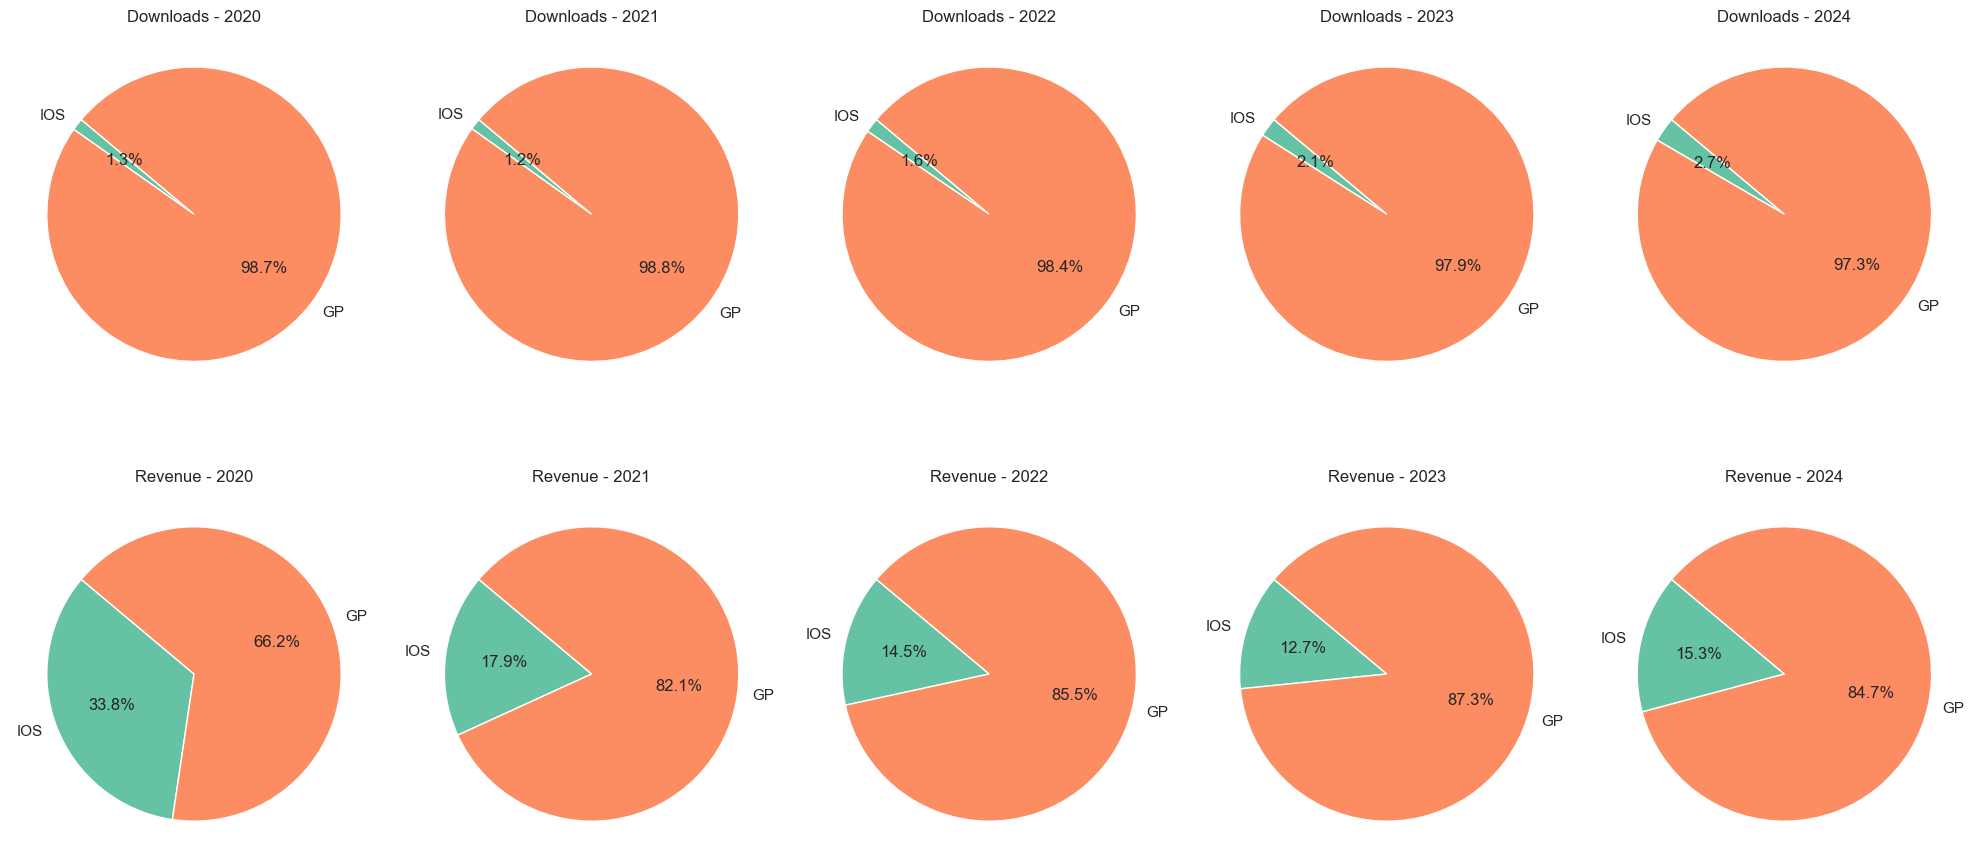

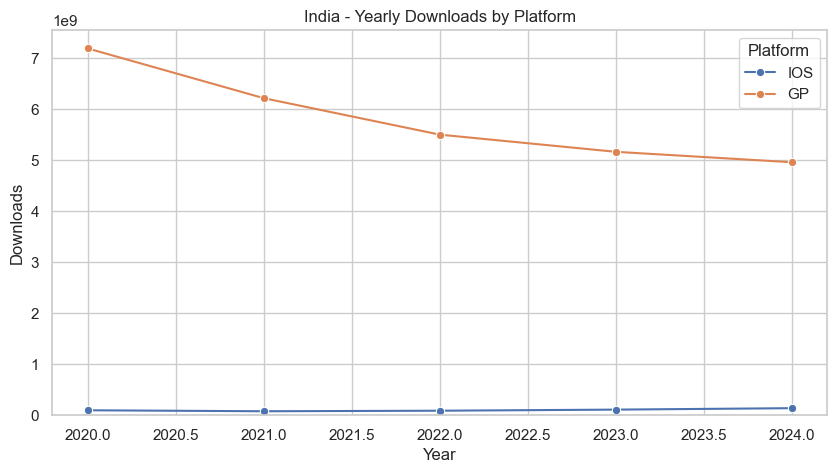

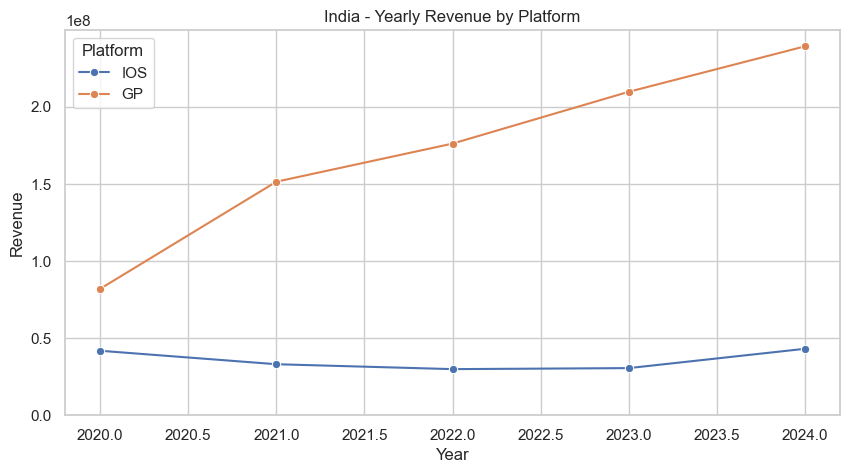

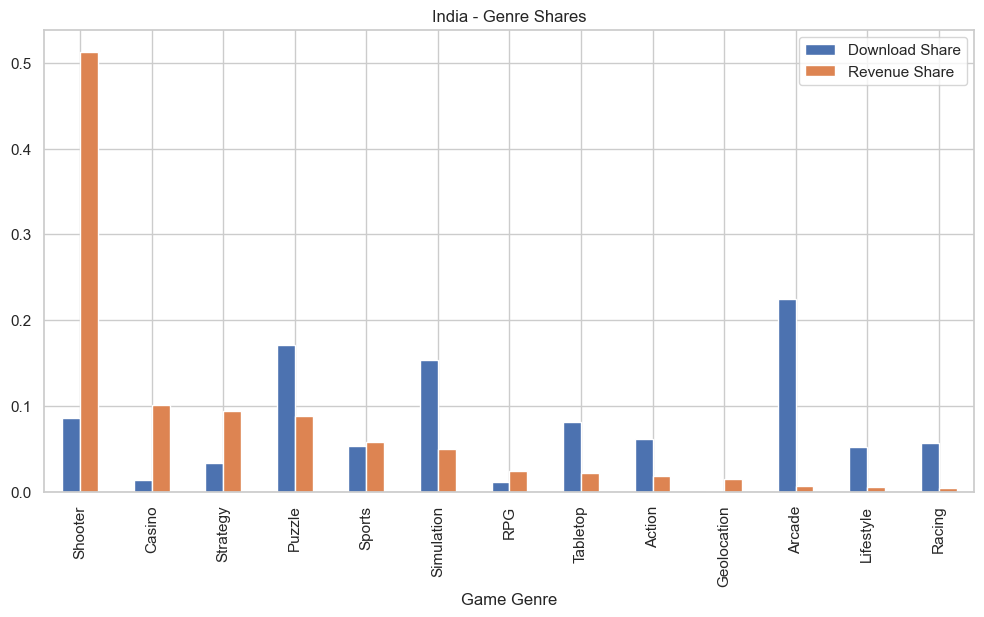

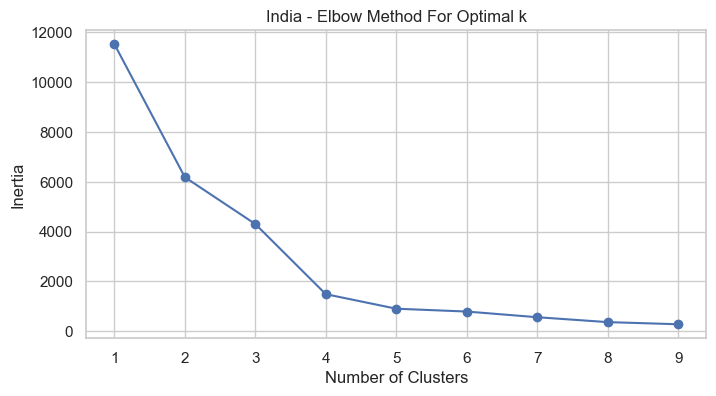

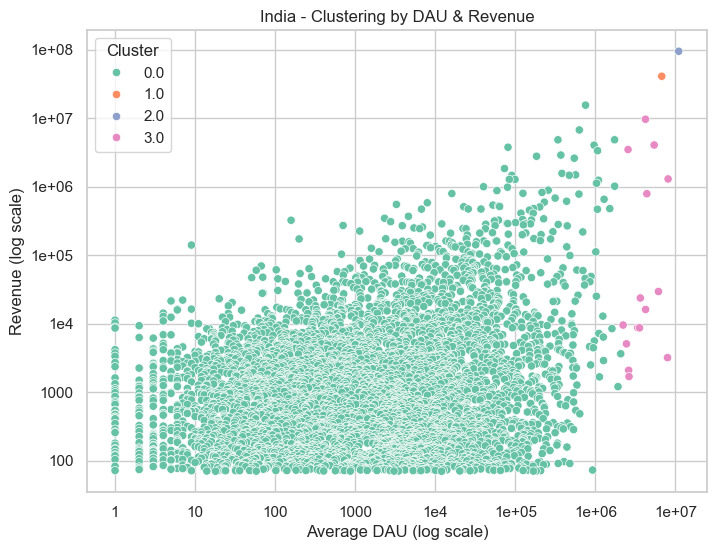

Cluster 0 Sample Apps in India:
            Unified Name  Average DAU (Absolute)      revenue
2            Coin Master                753224.0  15497570.59
4             eFootball™                629931.0   6729020.46
5                 Roblox               1736273.0   4840557.08
6  Call of Duty®: Mobile                340624.0   4830757.73
8             Pokémon GO                962706.0   4036298.77

Cluster 1 Sample Apps in India:
  Unified Name  Average DAU (Absolute)      revenue
1  PUBG MOBILE               6741386.0  40959652.55

Cluster 2 Sample Apps in India:
       Unified Name  Average DAU (Absolute)      revenue
0  Garena Free Fire              10977567.0  94943368.81

Cluster 3 Sample Apps in India:
                   Unified Name  Average DAU (Absolute)     revenue
3              Candy Crush Saga               4221554.0  9654825.61
7                Clash of Clans               5419734.0  4059582.23
10  EA SPORTS FC™ Mobile Soccer               2558609.0  3485772.98
20     

In [26]:
folder_path_in = r'C:\Users\selma\Desktop\game_trend\in'
summary_df_in = load_summary(folder_path_in, 'in')
plot_pie_charts(summary_df_in)
plot_trends(summary_df_in, "India")
genre_analysis_and_clustering(folder_path_in, "revenue_2024_in.csv", "India")


---

# 📌 PART 4：App Clustering & Genre Correlation 

---

<>:15: SyntaxWarning: invalid escape sequence '\$'
<>:15: SyntaxWarning: invalid escape sequence '\$'
C:\Users\selma\AppData\Local\Temp\ipykernel_3672\4220222843.py:15: SyntaxWarning: invalid escape sequence '\$'
  df['RPD (All Time, WW)'] = df['RPD (All Time, WW)'].replace('[\$,]', '', regex=True).astype(float)


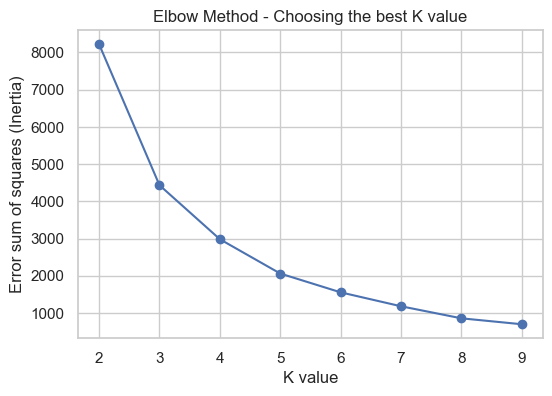

In [27]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

revenue_2024 = pd.read_csv(r'C:\Users\selma\Desktop\game_trend\revenue_2024.csv', encoding='utf-16', sep='\t')

df = revenue_2024.copy()

# Select features for clustering (only two key features are used)
features = ['Average DAU (Absolute)', 'RPD (All Time, WW)']

# Process the data, remove non-numeric characters and convert to float
df['RPD (All Time, WW)'] = df['RPD (All Time, WW)'].replace('[\$,]', '', regex=True).astype(float)
df['Average DAU (Absolute)'] = pd.to_numeric(df['Average DAU (Absolute)'], errors='coerce')

# Handling missing values (filling or deleting)
df.dropna(subset=features, inplace=True)

# Standardize Data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df[features])

# Select the best K value using the Elbow Method
inertia = []
K_range = range(2, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Method Diagram
plt.figure(figsize=(6, 4))
plt.plot(K_range, inertia, marker='o', linestyle='-')
plt.xlabel('K value')
plt.ylabel('Error sum of squares (Inertia)')
plt.title('Elbow Method - Choosing the best K value')
plt.show()

Cluster
2    6252
0     225
3      22
4      10
1       3
Name: count, dtype: int64

==== Cluster 0 ====
                    Unified Name  Average DAU (Absolute)  RPD (All Time, WW)
1                           王者荣耀              12459046.0               35.99
8                      地下城与勇士：起源                134420.0              103.89
9                           和平精英               1842251.0               26.88
35                           逆水寒                487661.0               41.28
36              ドラゴンボールZ ドッカンバトル                900289.0               32.23
39     GODDESS OF VICTORY: NIKKE                745877.0               49.52
44  Jackpot Party - Casino Slots                136222.0               33.27
47                     パズル＆ドラゴンズ                569970.0               95.37
52   Lightning Link Casino Slots                102043.0               48.89
63                捕鱼大作战-街机打鱼游戏王者                 83918.0               97.82

==== Cluster 1 ====
        Unified Name  Avera

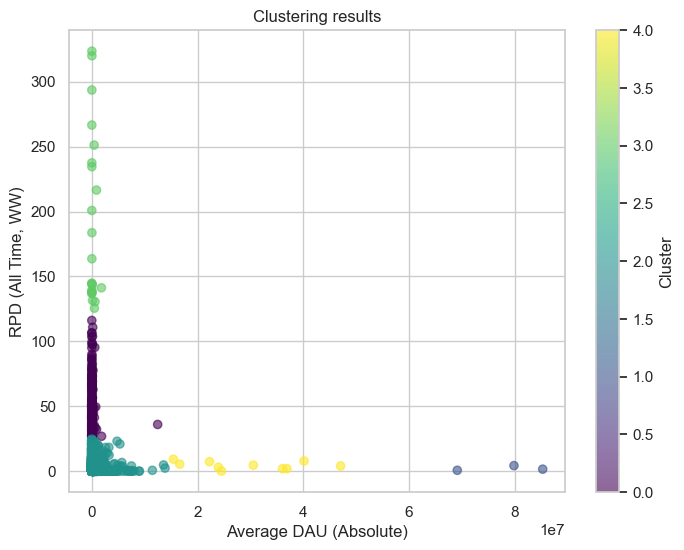

In [28]:
# Select the best K value and perform K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(data_scaled)

# View the distribution of apps in each category
print(df['Cluster'].value_counts())

# Displays a list of applications for each cluster category
for cluster in sorted(df['Cluster'].unique()):
    print(f"\n==== Cluster {cluster} ====")
    print(df[df['Cluster'] == cluster][['Unified Name', 'Average DAU (Absolute)', 'RPD (All Time, WW)']].head(10))

# Visualizing clustering results
plt.figure(figsize=(8, 6))
plt.scatter(df['Average DAU (Absolute)'], df['RPD (All Time, WW)'], c=df['Cluster'], cmap='viridis', alpha=0.6)
plt.xlabel('Average DAU (Absolute)')
plt.ylabel('RPD (All Time, WW)')
plt.title('Clustering results')
plt.colorbar(label='Cluster')
plt.show()


| **Cluster** | **Name** | **Description** |
|------------|---------|----------------|
| **0** | 🎮 Casual Sailors | Low DAU & Low RPD - Mostly free apps or casual games relying on ads. |
| **1** | 🐋 Pay-to-Win Whales | Low DAU & High RPD - Few users, but high spending power (subscription apps or heavy monetization). |
| **2** | 🌍 Traffic Giants | High DAU & Low RPD - Massive user base but low monetization (e.g., TikTok, Instagram). |
| **3** | ⚖ Balanced Warriors | Mid-range DAU & RPD - Well-balanced monetization and user engagement. |
| **4** | 👑 Revenue Kings | High DAU & High RPD - Top revenue-generating apps like AAA games or Netflix. |

In [29]:
# Run KMeans with your selected K (e.g., 5)
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(data_scaled)


In [30]:
genre_cluster_ct = pd.crosstab(df['Game Genre'], df['Cluster'])
print(genre_cluster_ct)


Cluster        0  1     2   3  4
Game Genre                      
Action         3  0   219   0  0
Arcade         8  0   464   2  1
Casino        26  0   547   1  0
Geolocation    2  0    11   1  1
Lifestyle      2  0   294   0  0
Puzzle         2  0  1067   0  1
RPG          128  0   973  12  0
Racing         0  0    97   0  0
Shooter        1  1   190   0  1
Simulation     3  1   921   0  0
Sports        11  0   301   1  2
Strategy      39  0   640   4  4
Tabletop       0  0   288   0  0


In [31]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(genre_cluster_ct)

print(f"Chi2 Statistic: {chi2:.2f}")
print(f"p-value: {p:.4f}")
if p < 0.05:
    print("✅ Significant correlation: Genre is associated with clusters.")
else:
    print("❌ No significant correlation: Genre and clusters may be independent.")


Chi2 Statistic: 443.40
p-value: 0.0000
✅ Significant correlation: Genre is associated with clusters.


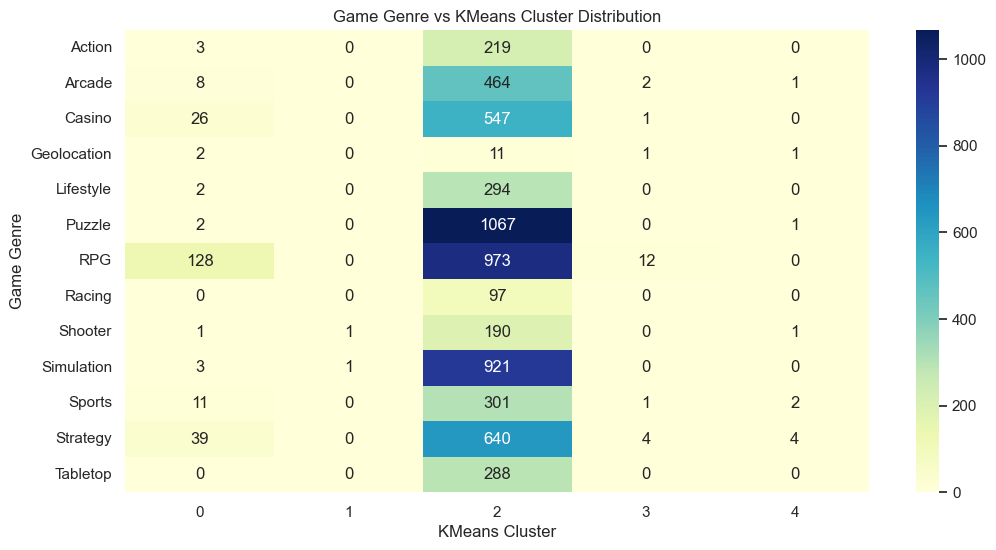

In [32]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.heatmap(genre_cluster_ct, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Game Genre vs KMeans Cluster Distribution")
plt.ylabel("Game Genre")
plt.xlabel("KMeans Cluster")
plt.show()


### Discussion:

- The Chi-square test yielded a significant result (χ² = 443.40, p < 0.0001), indicating that game genre is strongly associated with KMeans clustering. This suggests that genre distribution is not random across clusters, and cluster characteristics may reflect underlying genre-specific user behavior or monetization patterns.

- From the heatmap, several patterns emerge:

    - Cluster 2 dominates with genres like Puzzle, RPG, and Simulation, suggesting that this group includes games with high average DAU and/or stable RPD.
    
    - Cluster 3 is heavily skewed toward RPG titles (128), indicating a concentration of role-playing games with unique player engagement or monetization profiles.
    
    - Cluster 1 and Cluster 4 are relatively sparse, with small pockets of genres like Shooter, Strategy, and Arcade, possibly representing niche or outlier behavior.
    
    - This genre-cluster relationship can be useful for market segmentation: developers and publishers can tailor marketing strategies or monetization models based on the behavioral profiles of genres within specific clusters.



## Final Discussion

### ⚠️ Data Limitations
- The **annual granularity** of the dataset limited time-series forecasting to **linear regression**.
- Future studies could benefit from **monthly data** to enable more robust and flexible predictive models.

### 🇨🇳 China’s Underestimation
- The dataset **lacks Android data from non-Google Play sources**, significantly **underestimating China’s market**.
- Industry reports suggest China’s revenue **rivals the U.S.**, yet our iOS-only view aligns it closer to **Japan**.

### 🔍 Clustering Robustness
- **K-Means** offers intuitive segmentation based on **market size**.
- **Hierarchical Clustering** reveals **similarity structures** between countries.
- **DBSCAN** helps identify **outliers** like the U.S. and China.
- Despite differing methodologies, **clustering results remain consistent**, indicating stable regional groupings.

### 🇺🇸 vs 🇮🇳 U.S. and India Comparison
- Both are **global leaders** in downloads and revenue.
- However, they differ starkly in **platform shares** (iOS vs. Android) and **genre preferences**, emphasizing the need for **localized strategies**.

---

## ✅ Conclusion

This study provides a **comprehensive analysis** of the global mobile gaming market from **2020 to 2024**, revealing:

- Key **macroeconomic trends** and **regional market dynamics**.
- A decline in **downloads** due to **market saturation**.
- Stable or growing **revenue**, driven by **high-ARPU regions** like the **U.S.** and **Japan**.
- Distinct **market archetypes** through country-level clustering:
  - 🇺🇸 U.S. as a **revenue powerhouse**
  - 🇮🇳 India as a **high-download, low-revenue** market
  - 🇨🇳 China and 🇯🇵 Japan dominating **hardcore genres**

Game-level clustering further reveals **genre-based monetization opportunities**, offering valuable guidance for **developers** and **publishers** seeking to tailor their strategies by region and genre.

> 📌 Despite data limitations, this study serves as a strategic roadmap for navigating the **post-pandemic** mobile gaming landscape.

---

## 📚 References

- Gu, T. (2020). *COVID-19’s Impact on the Mobile Games Market: Consumer Engagement Spikes as Revenues Exceed $77 Billion.* Newzoo.  
  🔗 https://newzoo.com/resources/blog/mobile-games-market-engagement-revenues-covid-19-gaming

- Wooldridge, L. (2022). *Games Market Enters a New Era as Pandemic Years Reset Growth Dynamic.* Ampere Analysis.  
  🔗 https://www.ampereanalysis.com/insight/games-market-enters-a-new-era-as-pandemic-years-reset-growth-dynamic
